### Importações necessárias:

In [1]:
# Importa impressores_de graficos como imgr:
import impressores_de_graficos as imgr
# Importa metodos analiticos como mana:
import metodos_analiticos as mana
# Importa metodos descritivos como mdes:
import metodos_descritivos as mdes
# Importa numpy como np:
import numpy as np
# Importa pandas como pd:
import pandas as pd

# Preparação os dados:

In [2]:
# caminho: caminho do arquivo a ser prepardo;
def prepara_os_dados(caminho):
    # Lê arquivo:
    df = pd.read_pickle(caminho)
    # Substitui -9999.0 por NaN (valor ausente):
    df = df.replace(-9999.0, float('nan'))
    # Dropa alguns atributos:
    df = df.drop(columns=["DATA (YYYY-MM-DD)", "HORA (UTC)", "RADIACAO GLOBAL (KJ/m²)",
                          'RADIACAO GLOBAL (Kj/m²)', 'Hora UTC', 'Data'])
    # Remove as tuplas que contêm qualquer valor NaN e recalcula os índices após a remoção:
    df = df.dropna().reset_index()
    # Dropa o atributo index:
    df = df.drop(columns=['index'])
    # Retorna dataframe:
    return df

In [3]:
df_DF = prepara_os_dados("./Dados/dataframe_A001_mod.pkl")
df_AM = prepara_os_dados("./Dados/dataframe_A101_mod.pkl")
df_BA = prepara_os_dados("./Dados/dataframe_A401_mod.pkl")
df_RJ = prepara_os_dados("./Dados/dataframe_A601_mod.pkl")
df_RS = prepara_os_dados("./Dados/dataframe_A801_mod.pkl")

# Análise de sazonalidade:

In [4]:
atr_temporal = "Date_mod"

## Temperatura do Ar:

In [5]:
atr_imagem = "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"

### Brasília:

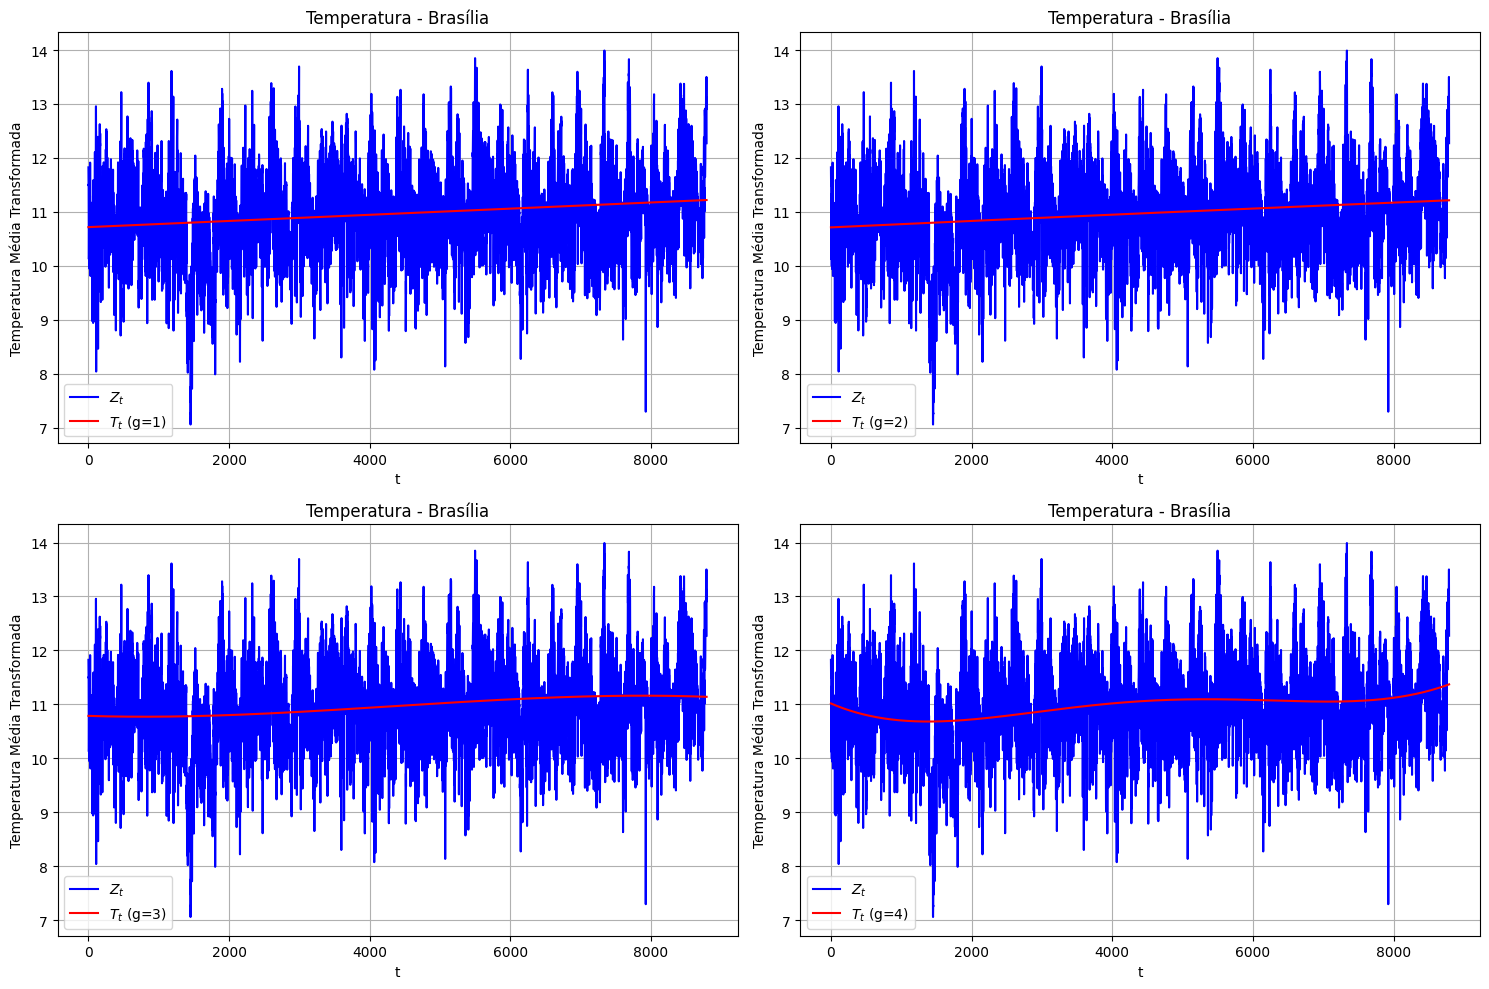

In [6]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_DF, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Temperatura Média (°C)" if valor_lambda is None else "Temperatura Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Temperatura - Brasília", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:230: RuntimeWarning: overflow encountered in exp
  return alfa/(1+beta*np.exp(-gama*t))


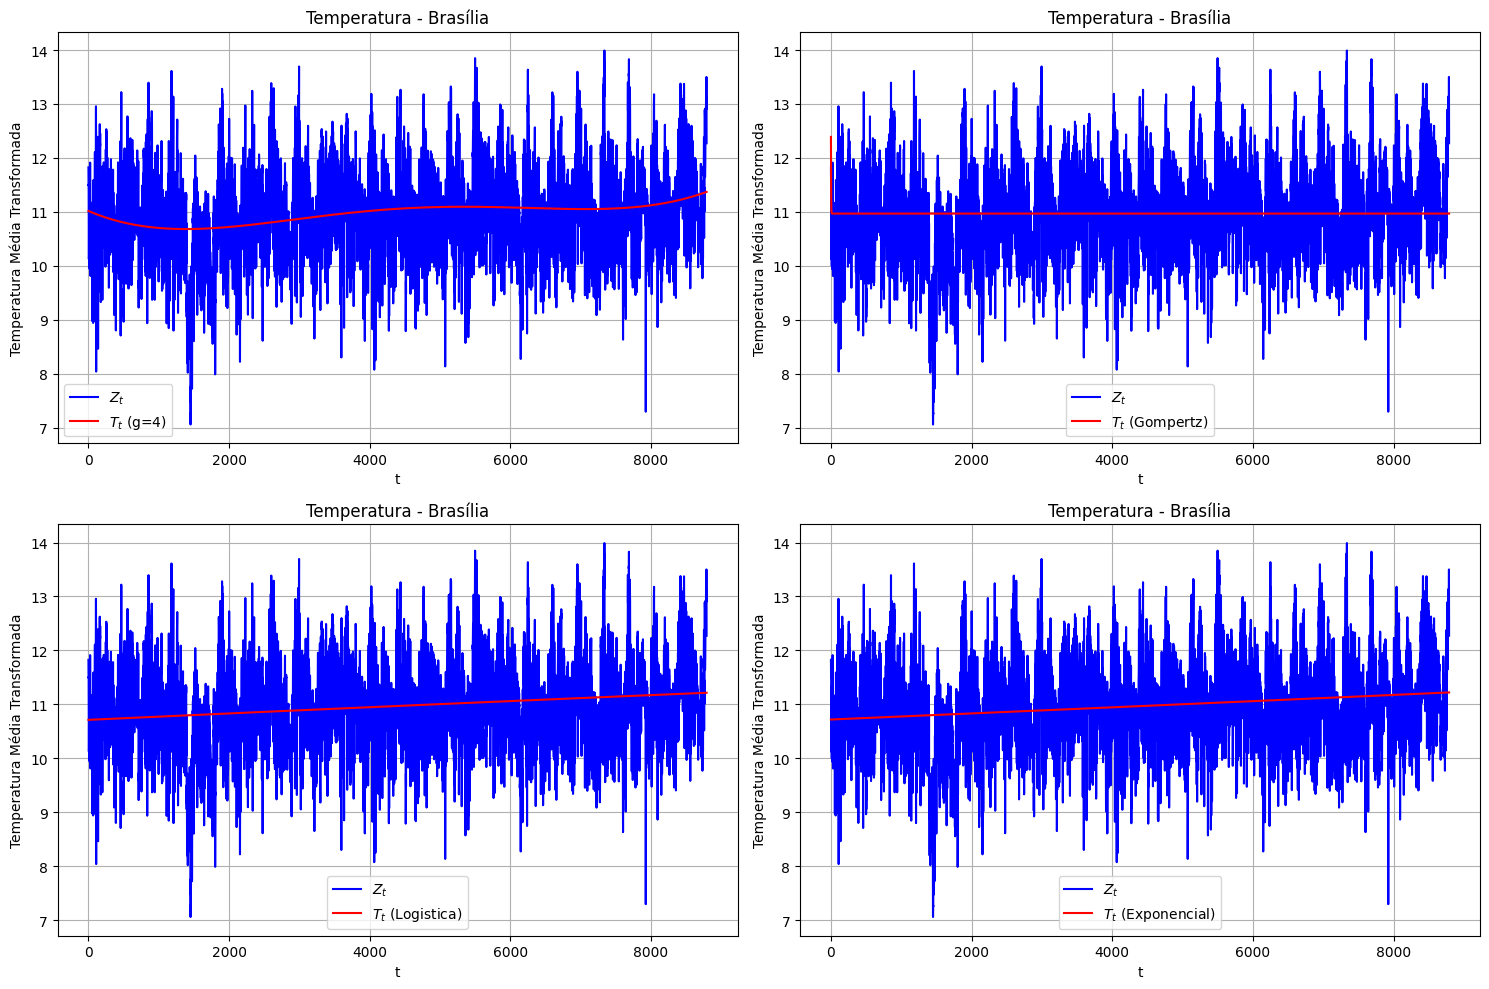

In [7]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Temperatura - Brasília", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

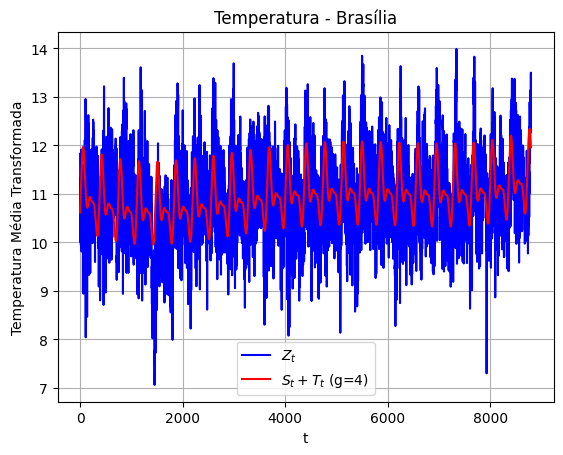

In [8]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Temperatura - Brasília", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Salvador:

In [9]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_BA, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Temperatura Média (°C)" if valor_lambda is None else "Temperatura Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Temperatura - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [10]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Temperatura - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

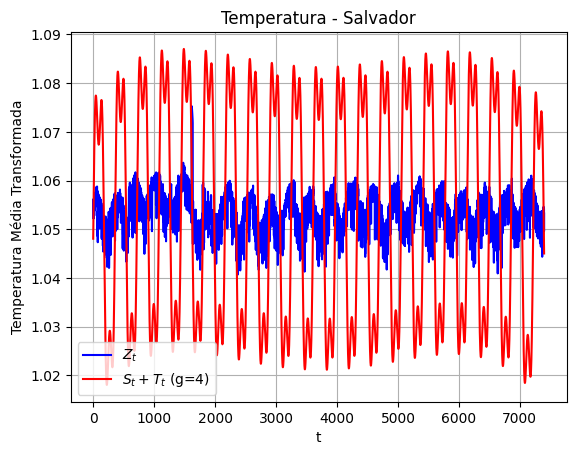

In [11]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Temperatura - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Manaus:

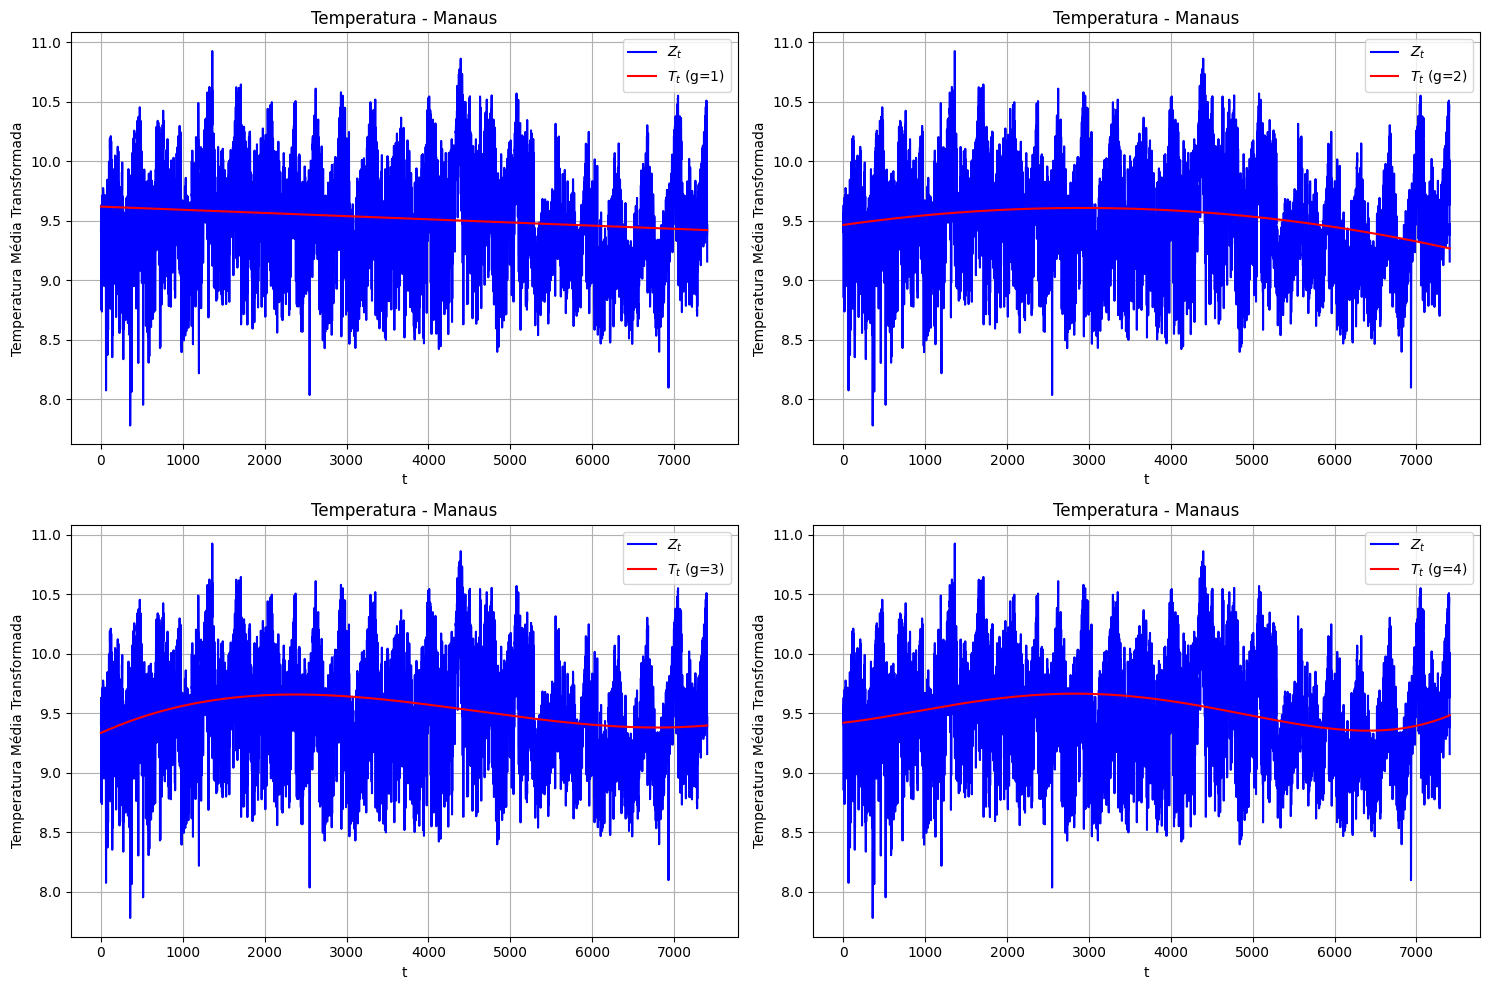

In [12]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_AM, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Temperatura Média (°C)" if valor_lambda is None else "Temperatura Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Temperatura - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:230: RuntimeWarning: overflow encountered in exp
  return alfa/(1+beta*np.exp(-gama*t))


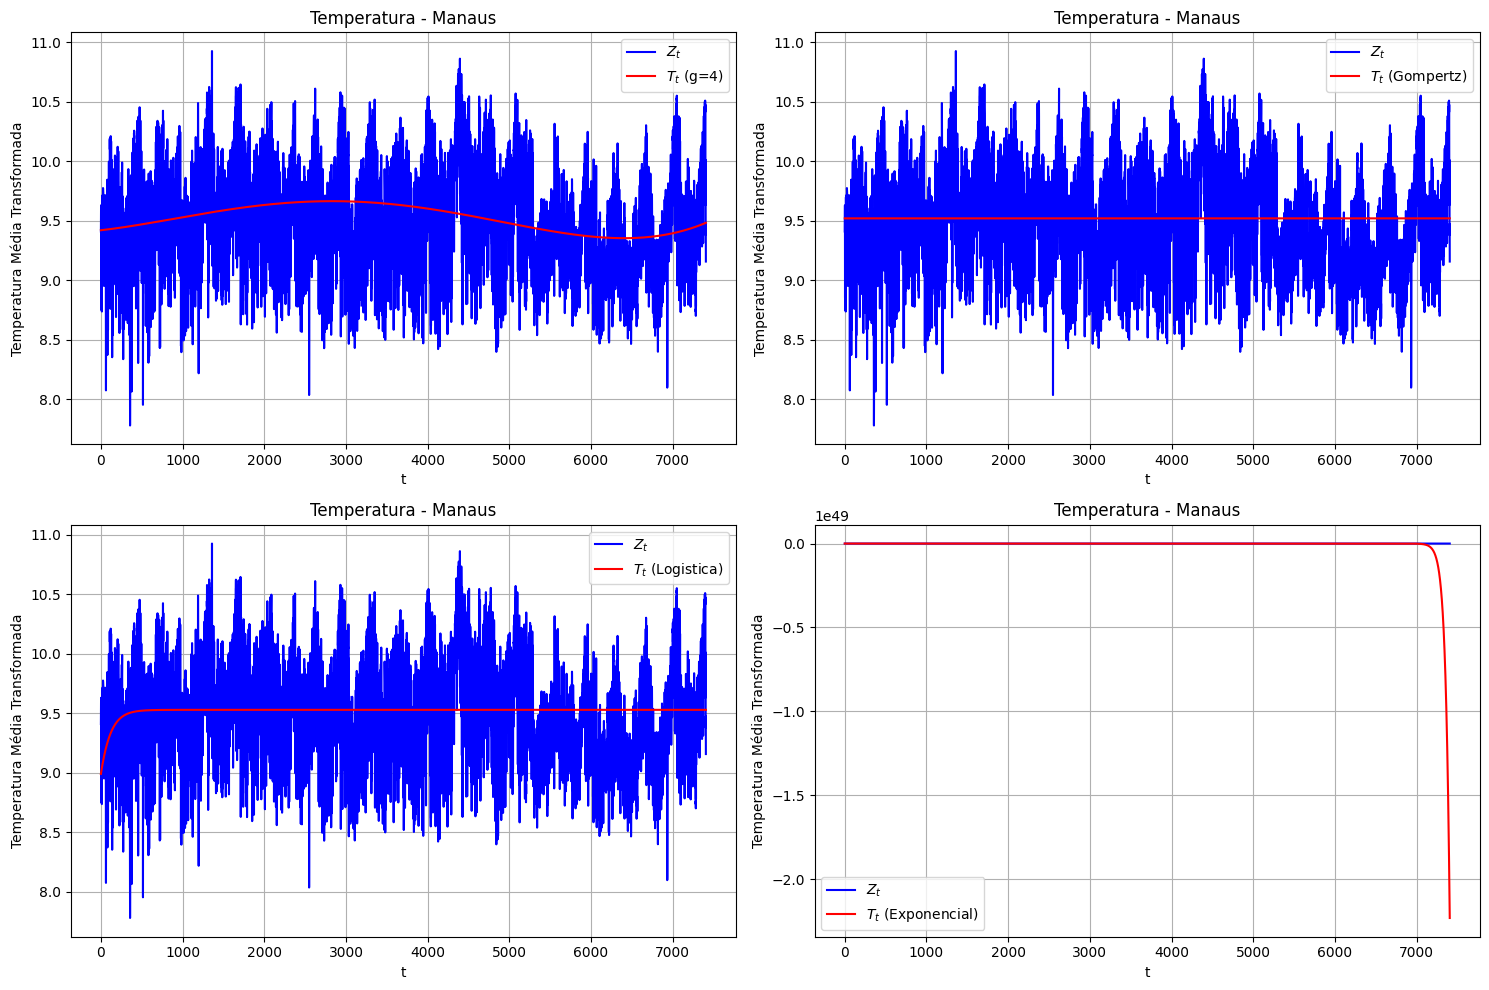

In [13]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Temperatura - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

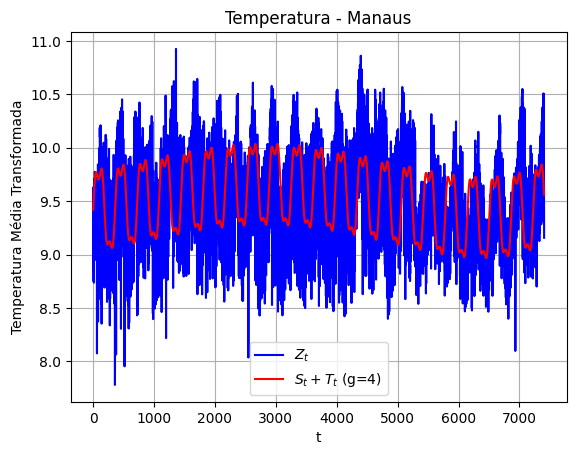

In [14]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Temperatura - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Rio de Janeiro:

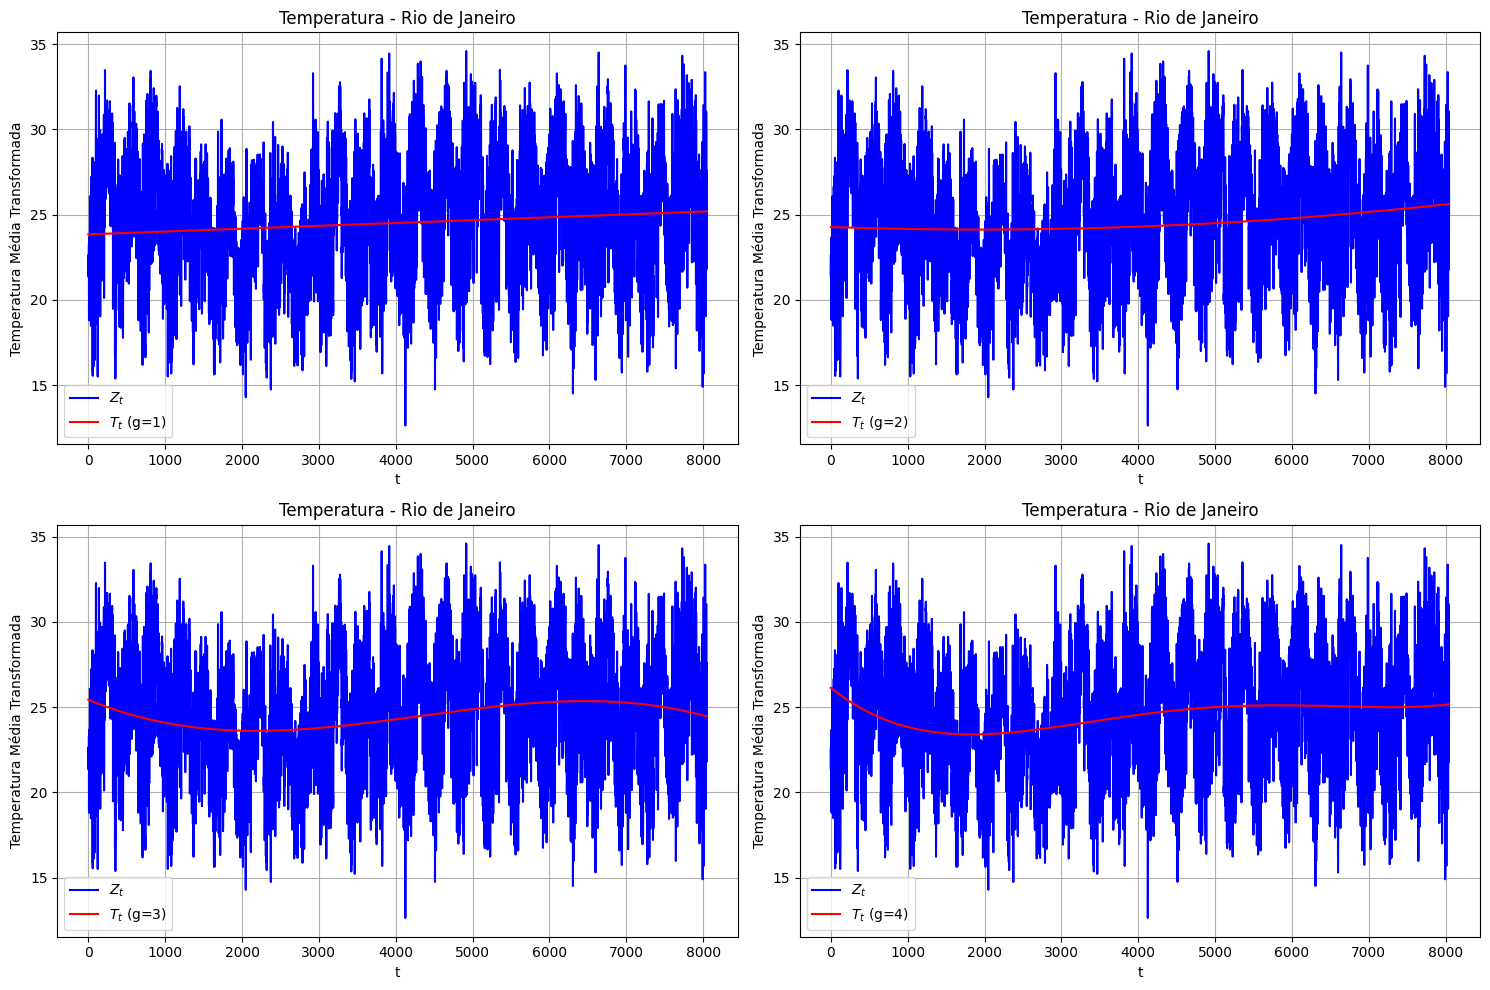

In [15]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_RJ, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Temperatura Média (°C)" if valor_lambda is None else "Temperatura Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Temperatura - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [16]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Temperatura - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:230: RuntimeWarning: overflow encountered in exp
  return alfa/(1+beta*np.exp(-gama*t))
/home/vrr/Área de trabalho/meu-ambiente-python/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/home/vrr/Área de trabalho/meu-ambiente-python/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/vrr/Área de trabalho/meu-ambiente-python/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1048: RuntimeWarning: invalid value encountered in multiply
  pcov = pcov * s_sq


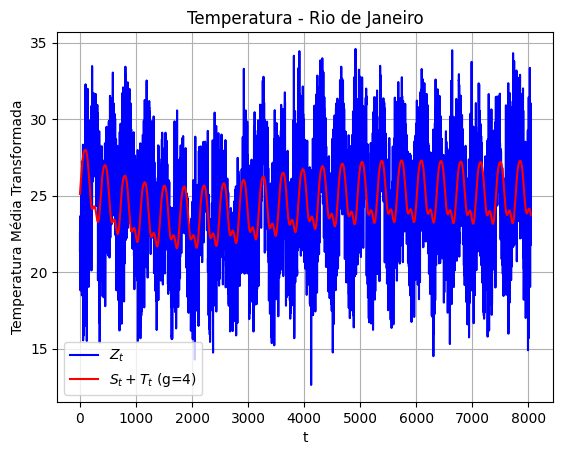

In [17]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Temperatura - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Porto Alegre:

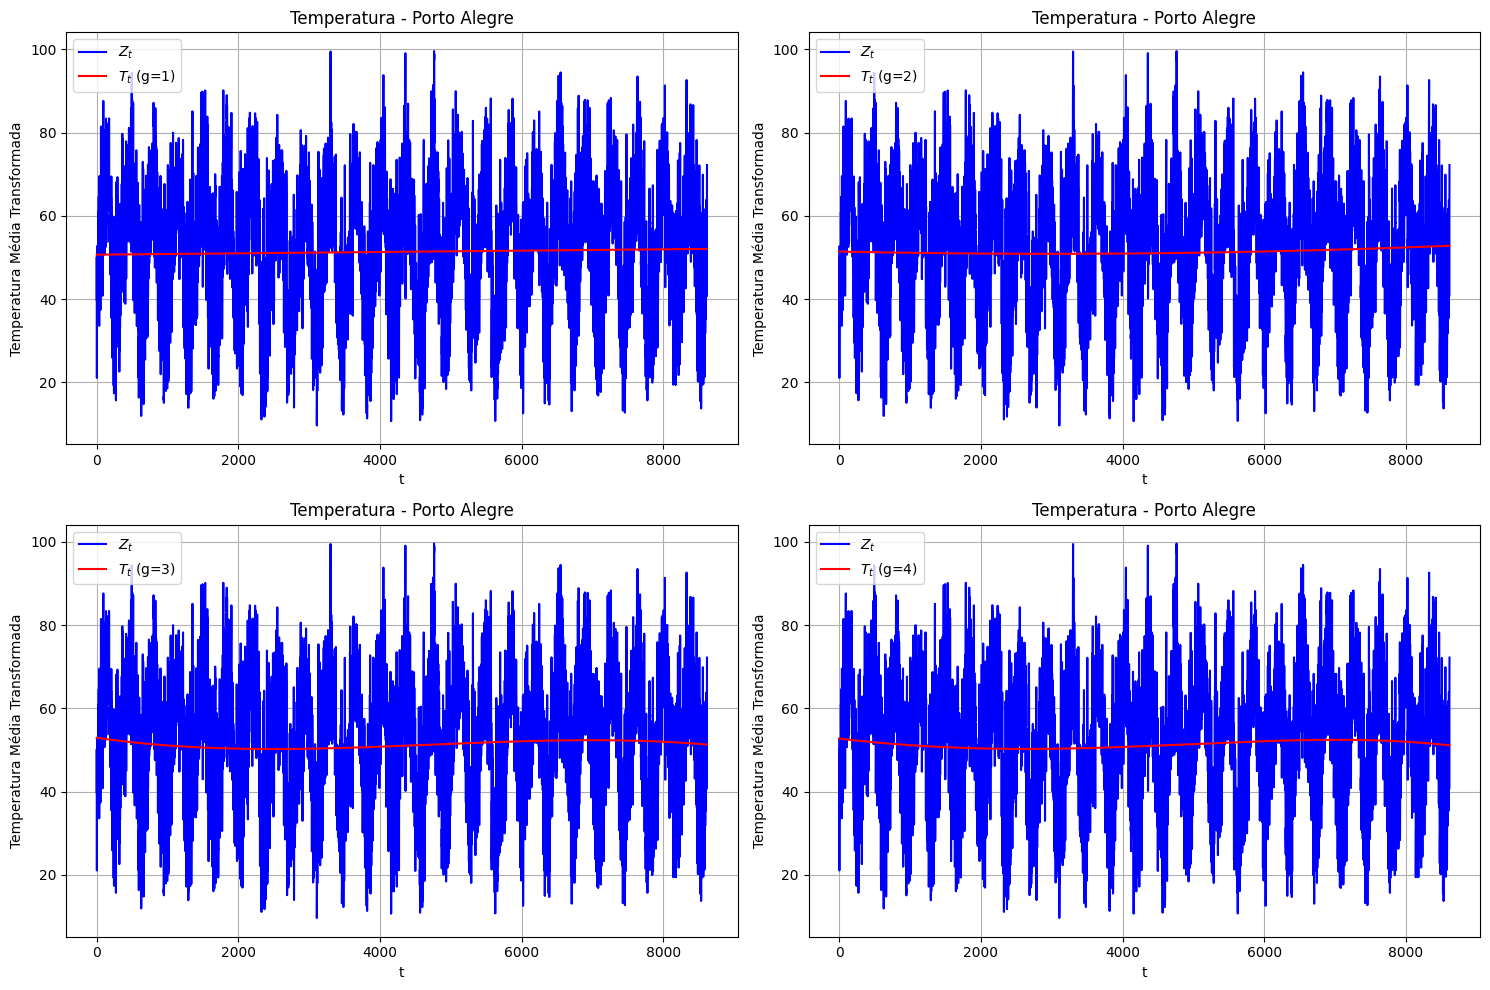

In [18]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_RS, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Temperatura Média (°C)" if valor_lambda is None else "Temperatura Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Temperatura - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [19]:
# T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
# T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
# T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

# seqs = [[Z_t, seqs_T_t[-1]],
#         [Z_t, T_t_2],
#         [Z_t, T_t_3],
#         [Z_t, T_t_4]]

# config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
# config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
# config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
# config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
# config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

# config_seqs = [[config_0, config_1],
#                [config_0, config_2],
#                [config_0, config_3],
#                [config_0, config_4]]

# config_5 = {"titulo":"Temperatura - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
# config_graf = [config_5]*4

# imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

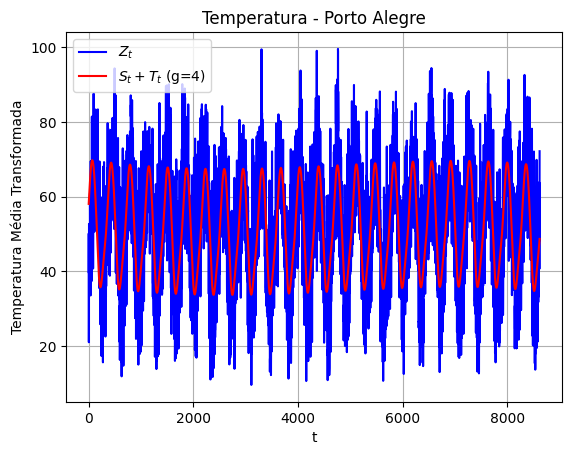

In [20]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Temperatura - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

## Precipitação:

In [54]:
atr_imagem = "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"

### Brasília:

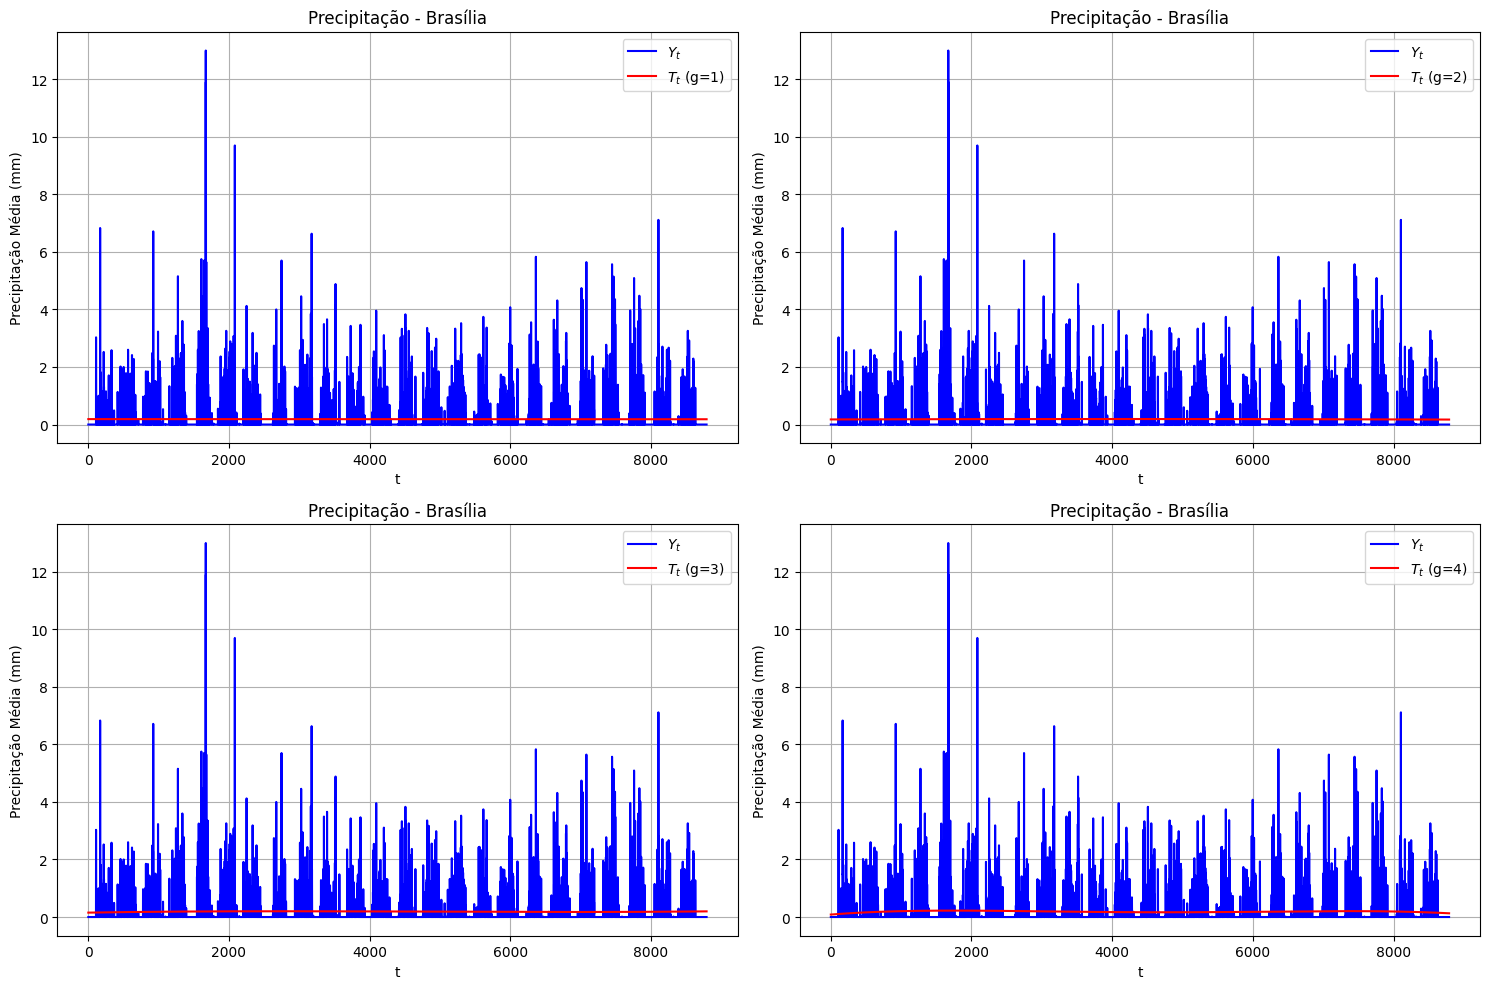

In [55]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_DF, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Precipitação Média (mm)" if valor_lambda is None else "Precipitação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Precipitação - Brasília", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [56]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Precipitação - Brasília", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = (alfa-Y_t_ss[0])/Y_t_ss[0] if Y_t_ss[0] != 0 else 1.0 # taxa de crescimento inicial.
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:210: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_Y = Y_t_ss[1]-Y_t_ss[0] if Y_t_ss[1] != Y_t_ss[0] else 1.0
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:243: FutureWarning: Series.__

In [57]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Precipitação - Brasília ", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Salvador:

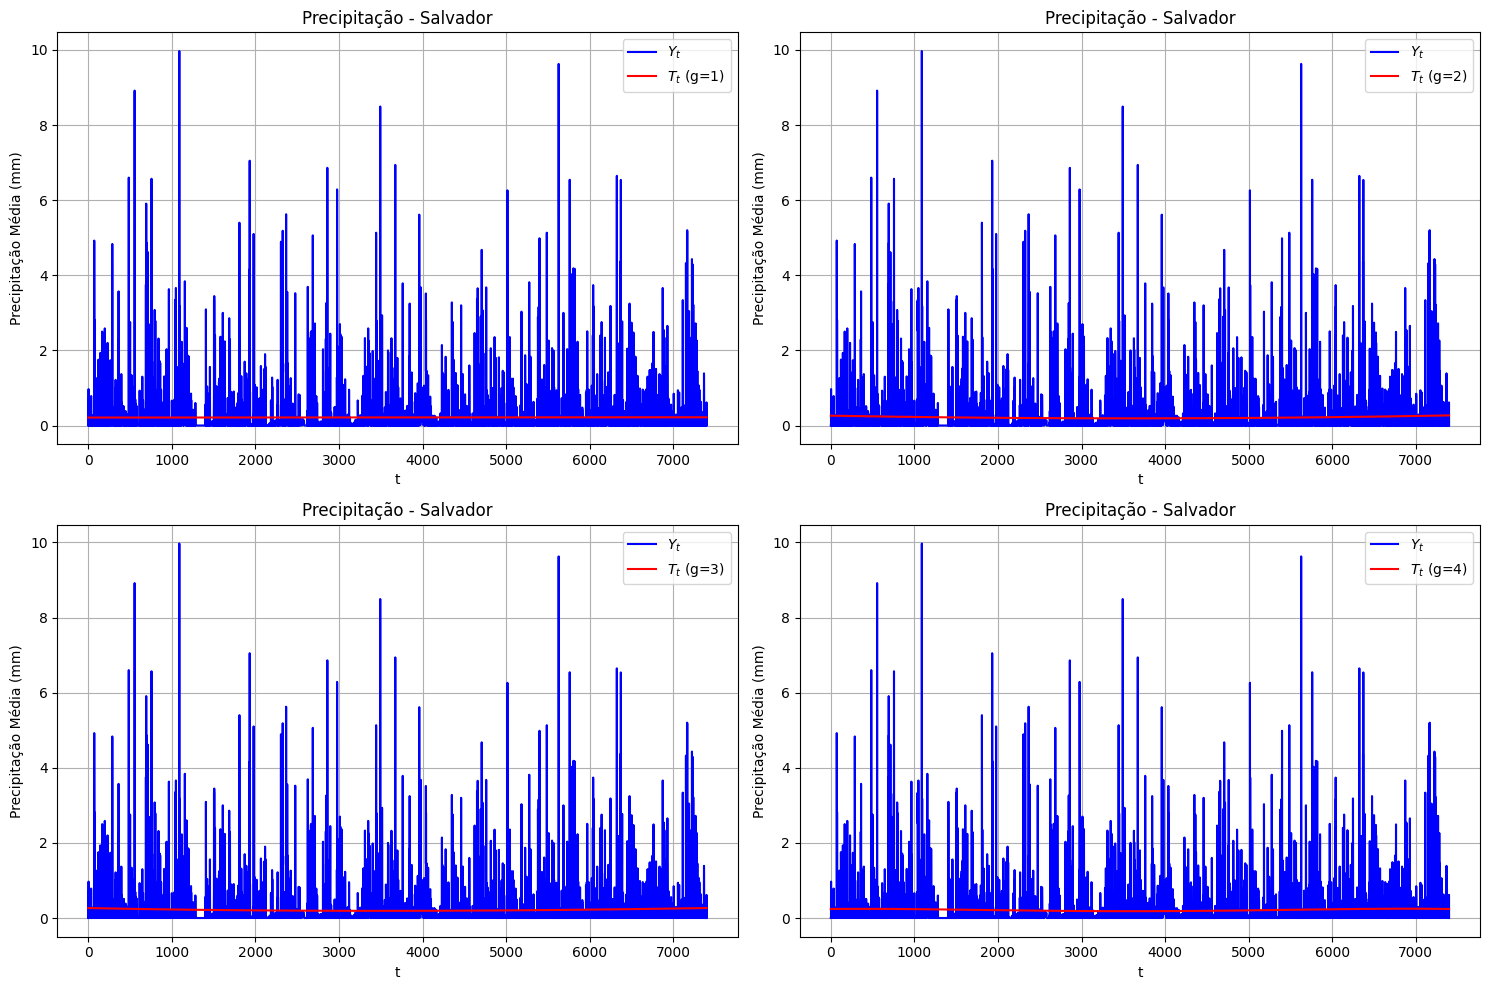

In [58]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_BA, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Precipitação Média (mm)" if valor_lambda is None else "Precipitação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Precipitação - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [ ]:
# T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
# T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
# T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

# seqs = [[Z_t, seqs_T_t[-1]],
#         [Z_t, T_t_2],
#         [Z_t, T_t_3],
#         [Z_t, T_t_4]]

# config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
# config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
# config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
# config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
# config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

# config_seqs = [[config_0, config_1],
#                [config_0, config_2],
#                [config_0, config_3],
#                [config_0, config_4]]

# config_5 = {"titulo":"Precipitação - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
# config_graf = [config_5]*4

# imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

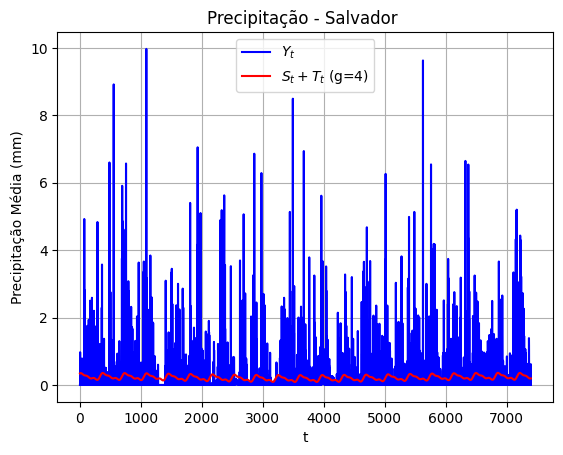

In [59]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Precipitação - Salvador ", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Manaus:

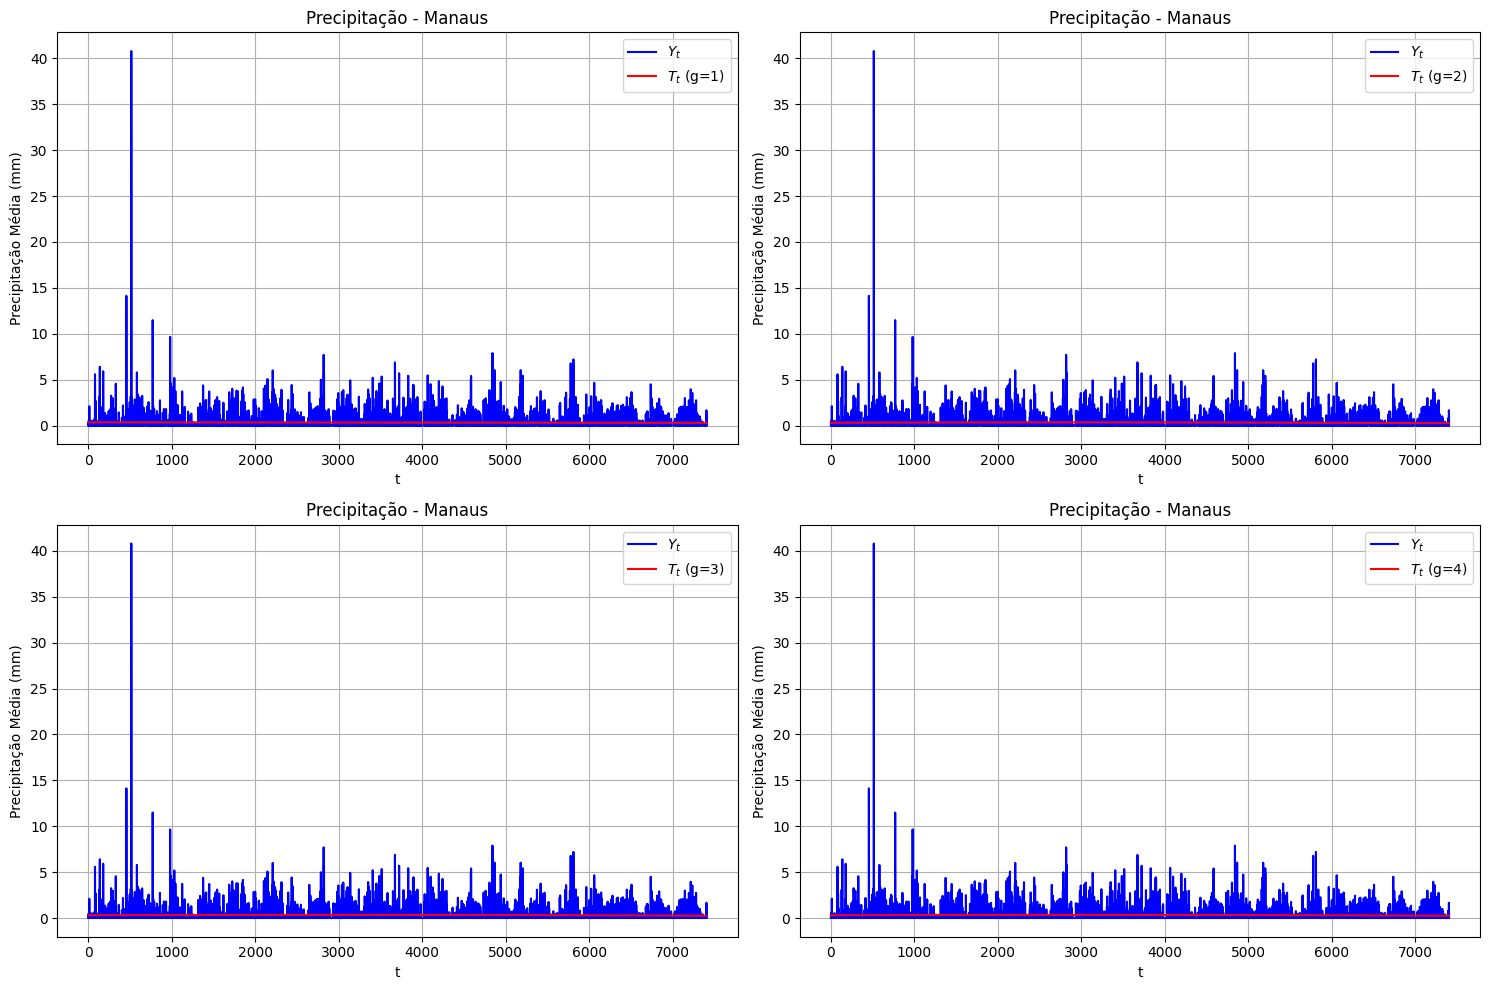

In [60]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_AM, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Precipitação Média (mm)" if valor_lambda is None else "Precipitação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Precipitação - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [61]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Precipitação - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = (alfa-Y_t_ss[0])/Y_t_ss[0] if Y_t_ss[0] != 0 else 1.0 # taxa de crescimento inicial.
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:210: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_Y = Y_t_ss[1]-Y_t_ss[0] if Y_t_ss[1] != Y_t_ss[0] else 1.0
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:243: FutureWarning: Series.__

In [62]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Precipitação - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Rio de Janeiro:

In [63]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_RJ, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Precipitação Média (mm)" if valor_lambda is None else "Precipitação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Precipitação - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = (alfa-Y_t_ss[0])/Y_t_ss[0] if Y_t_ss[0] != 0 else 1.0 # taxa de crescimento inicial.
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:210: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_Y = Y_t_ss[1]-Y_t_ss[0] if Y_t_ss[1] != Y_t_ss[0] else 1.0
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:243: FutureWarning: Series.__

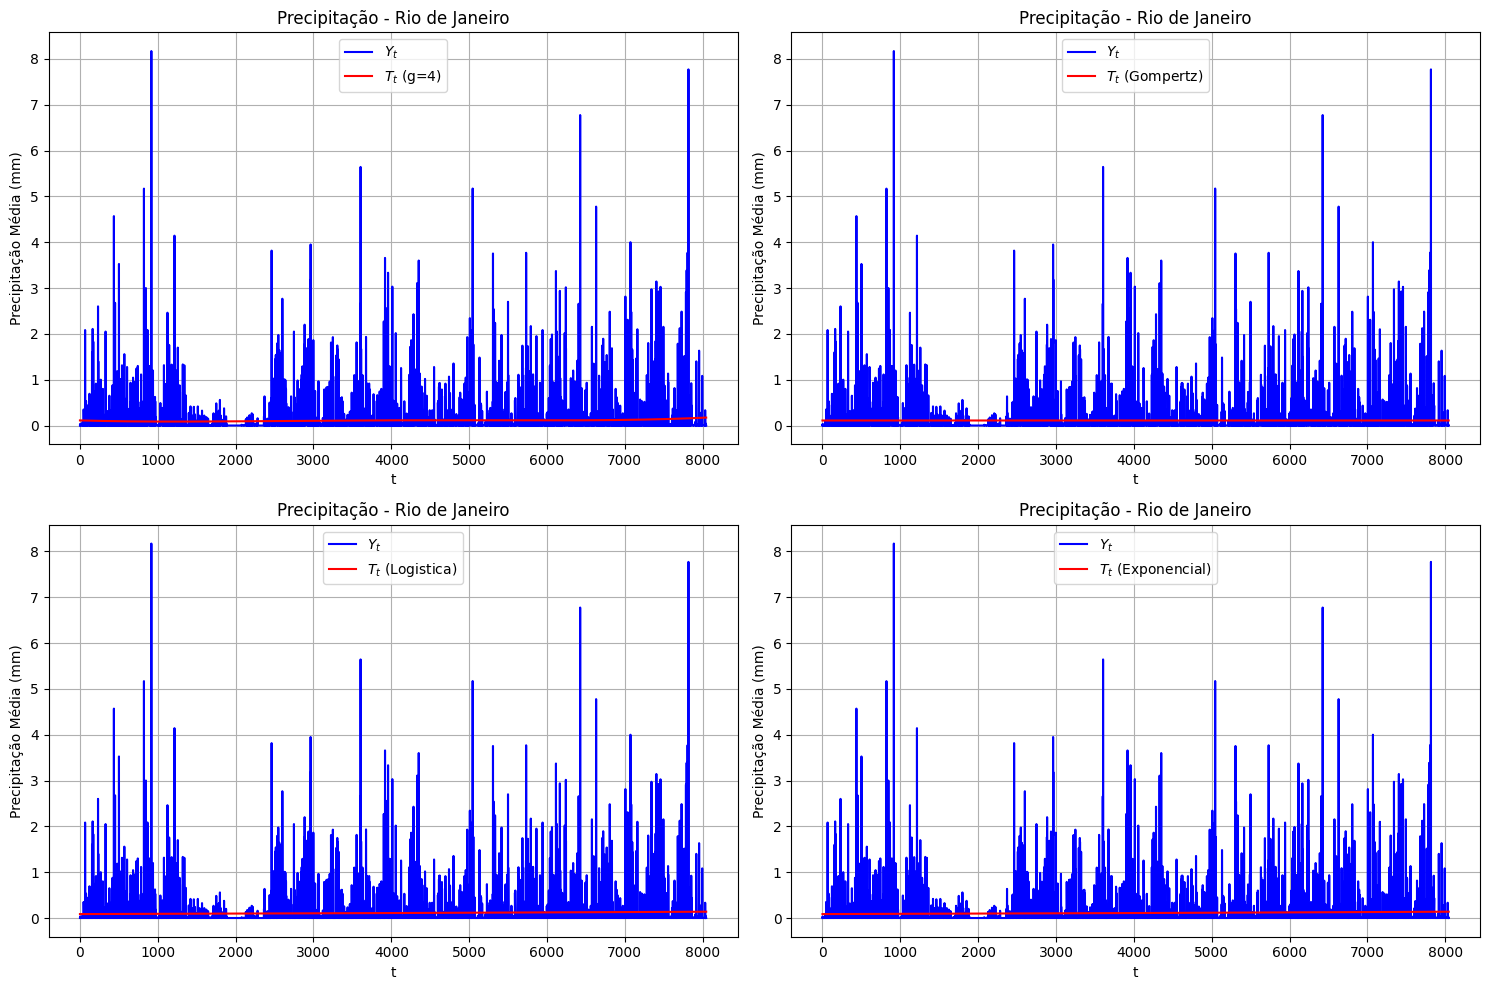

In [64]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Precipitação - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

In [65]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Precipitação - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Porto Alegre:

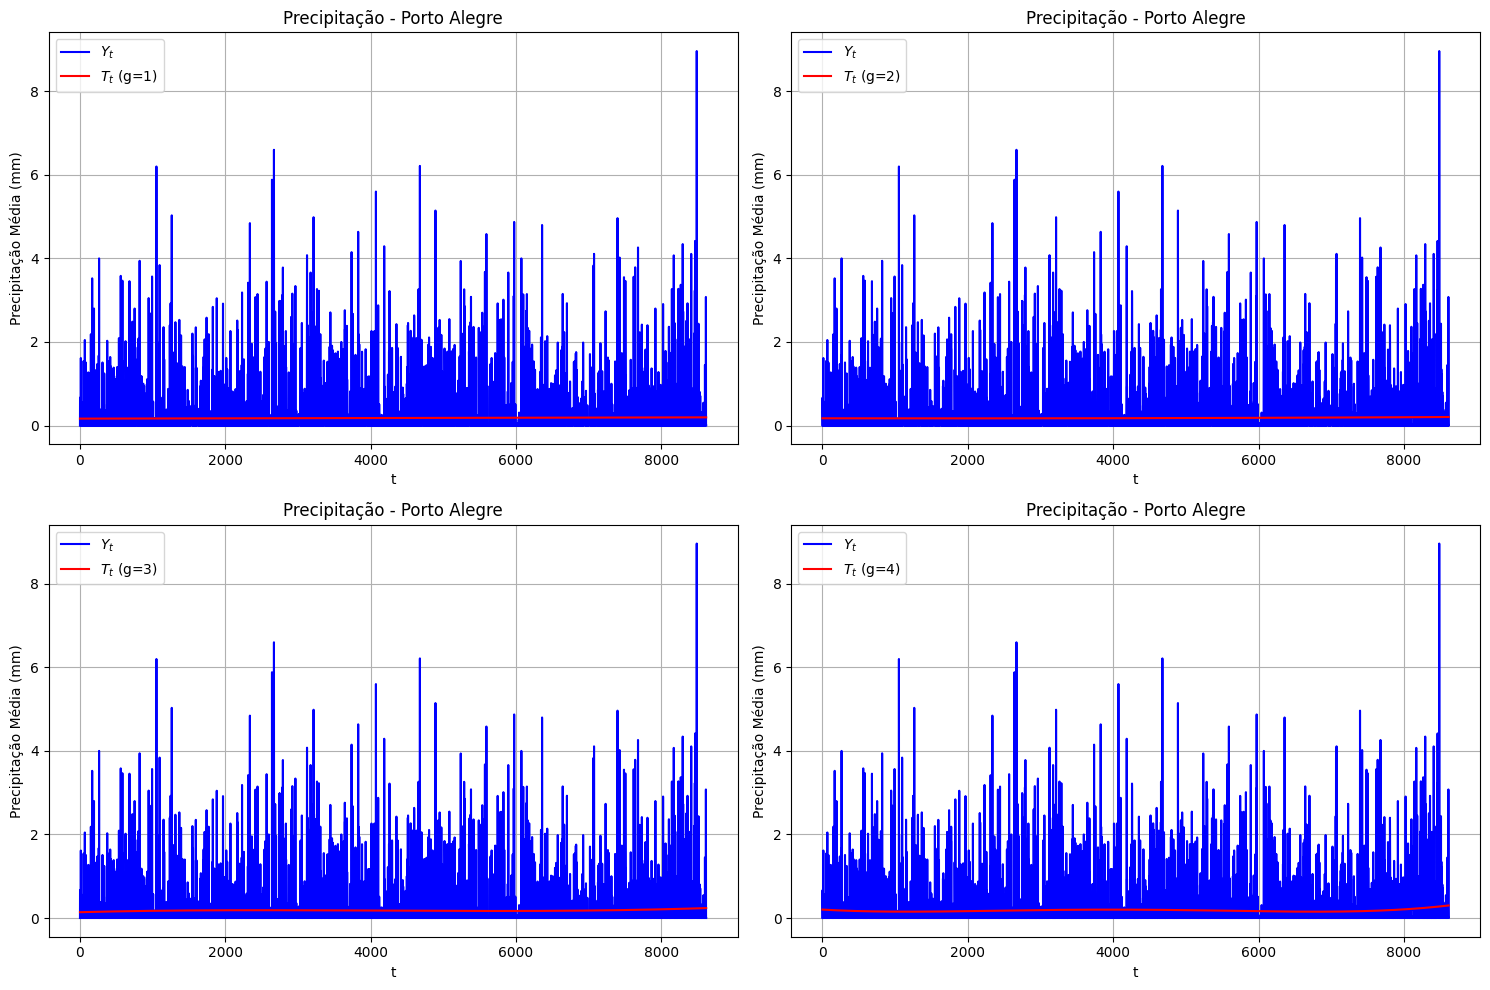

In [66]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_RS, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Precipitação Média (mm)" if valor_lambda is None else "Precipitação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Precipitação - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [ ]:
# T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
# T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
# T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

# seqs = [[Z_t, seqs_T_t[-1]],
#         [Z_t, T_t_2],
#         [Z_t, T_t_3],
#         [Z_t, T_t_4]]

# config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
# config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
# config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
# config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
# config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

# config_seqs = [[config_0, config_1],
#                [config_0, config_2],
#                [config_0, config_3],
#                [config_0, config_4]]

# config_5 = {"titulo":"Precipitação - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
# config_graf = [config_5]*4

# imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

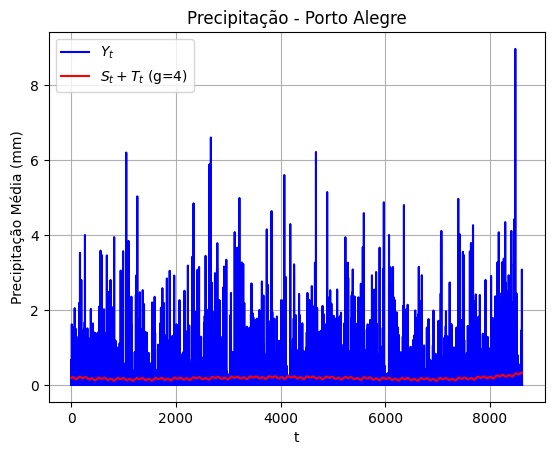

In [67]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Precipitação - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

## Radiação:

In [37]:
atr_imagem = "RADIACAO_GLOBAL(Kj/m²)_mod"

### Brasília:

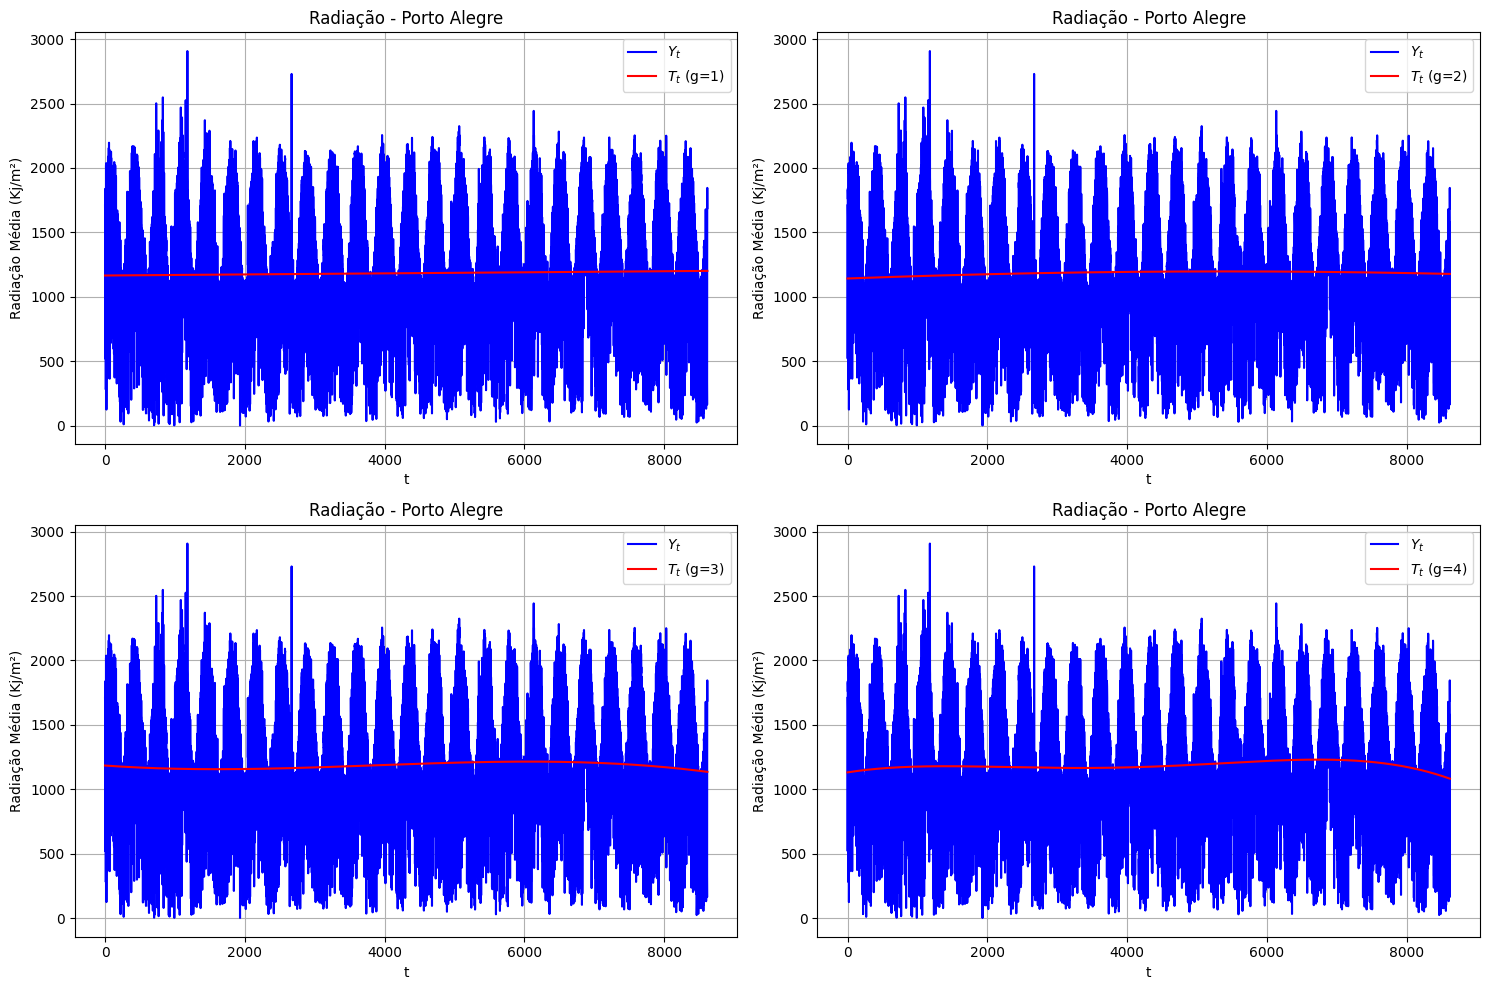

In [38]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_RS, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Radiação Média (Kj/m²)" if valor_lambda is None else "Radiação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Radiação - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = (alfa-Y_t_ss[0])/Y_t_ss[0] if Y_t_ss[0] != 0 else 1.0 # taxa de crescimento inicial.
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:210: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_Y = Y_t_ss[1]-Y_t_ss[0] if Y_t_ss[1] != Y_t_ss[0] else 1.0
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:243: FutureWarning: Series.__

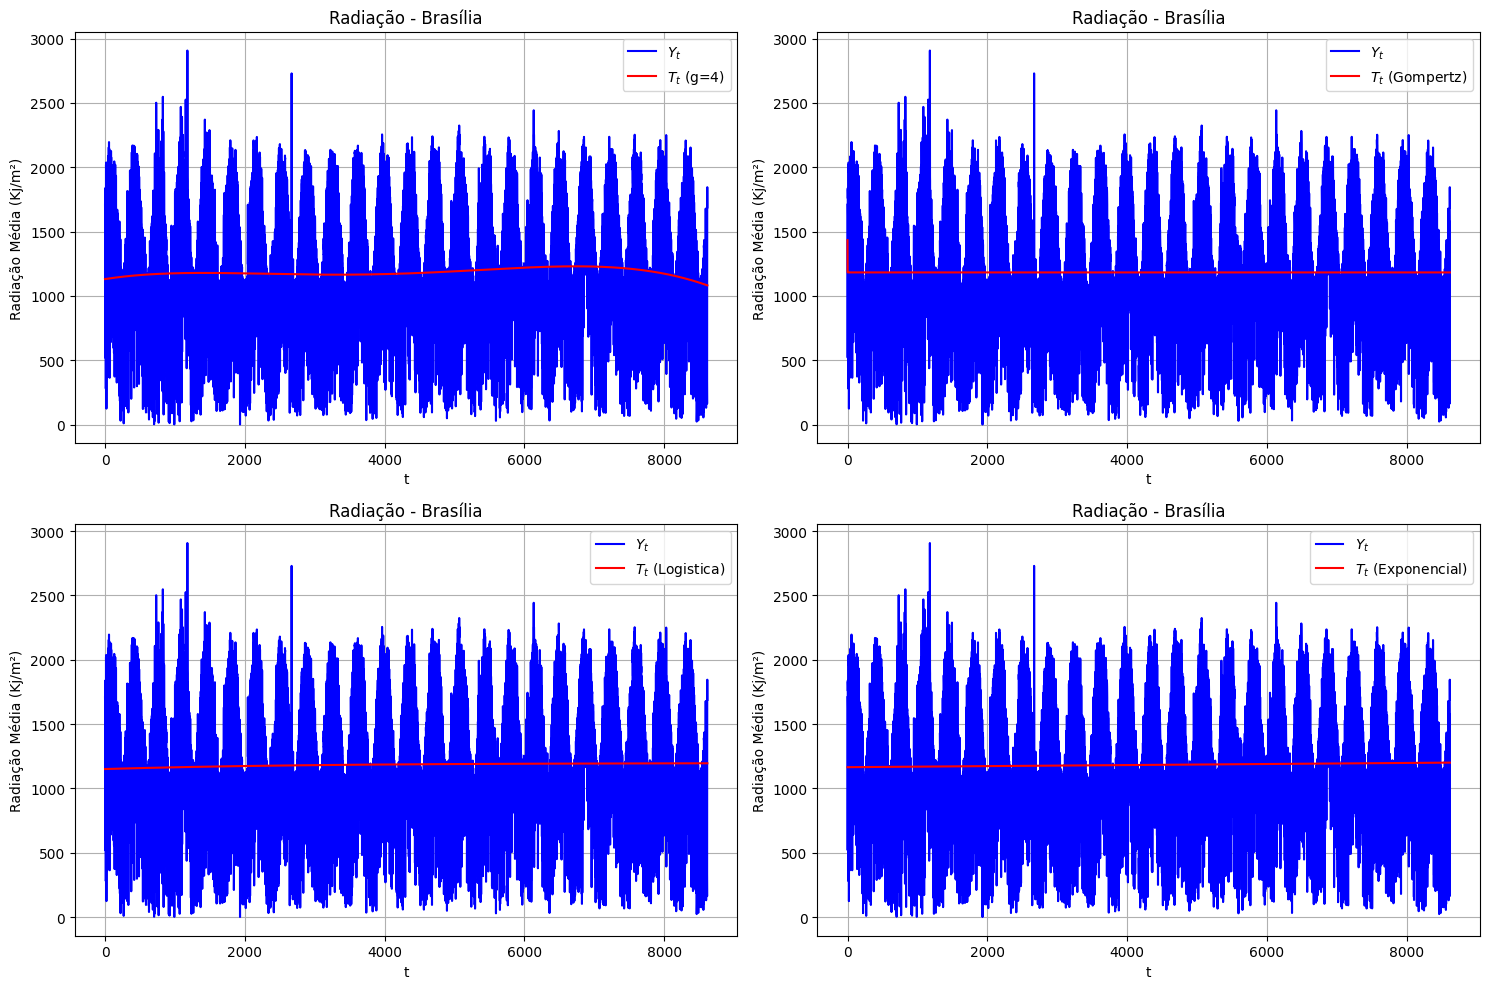

In [39]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Radiação - Brasília", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

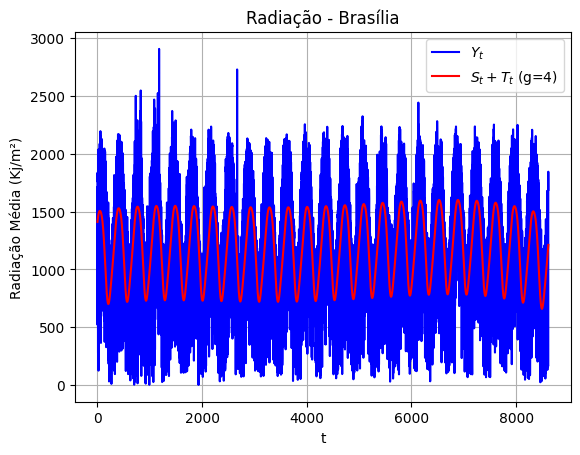

In [40]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Radiação - Brasília", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Salvador:

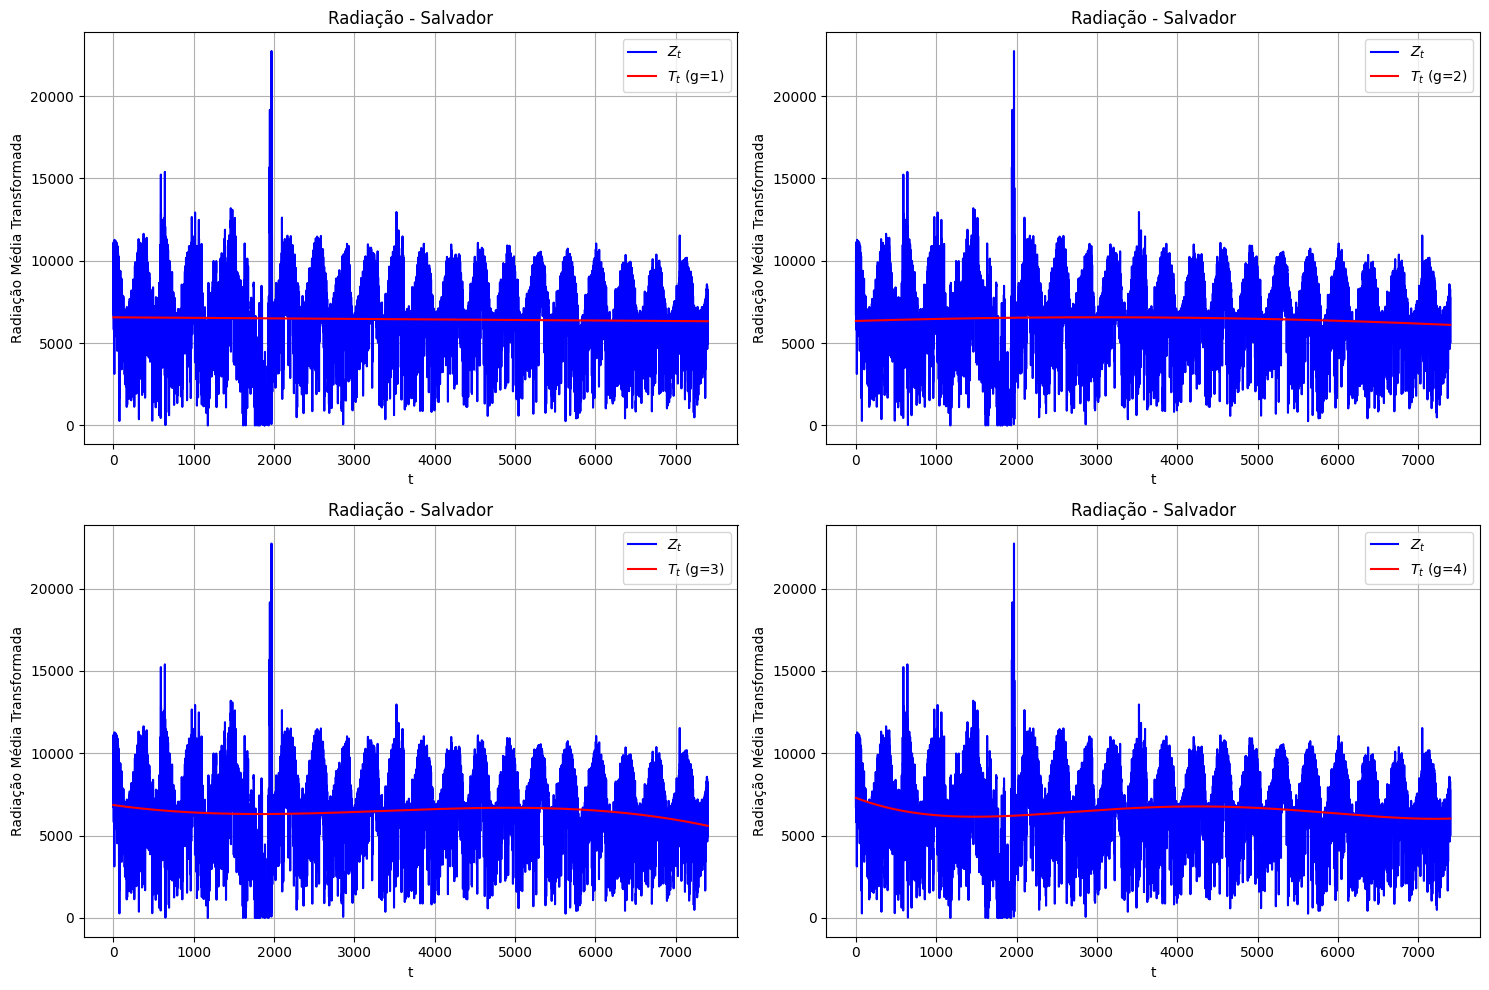

In [41]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_BA, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Radiação Média (Kj/m²)" if valor_lambda is None else "Radiação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Radiação - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:230: RuntimeWarning: overflow encountered in exp
  return alfa/(1+beta*np.exp(-gama*t))
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:261: RuntimeWarning: overflow encountered in exp
  return alfa*np.exp(beta*t)
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:261: RuntimeWarning: overflow encountered in multiply
  return alfa*np.exp(beta*t)
/home/vrr/Área de trabalho/meu-ambiente-python/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:277: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros_ajustados, _ = cur

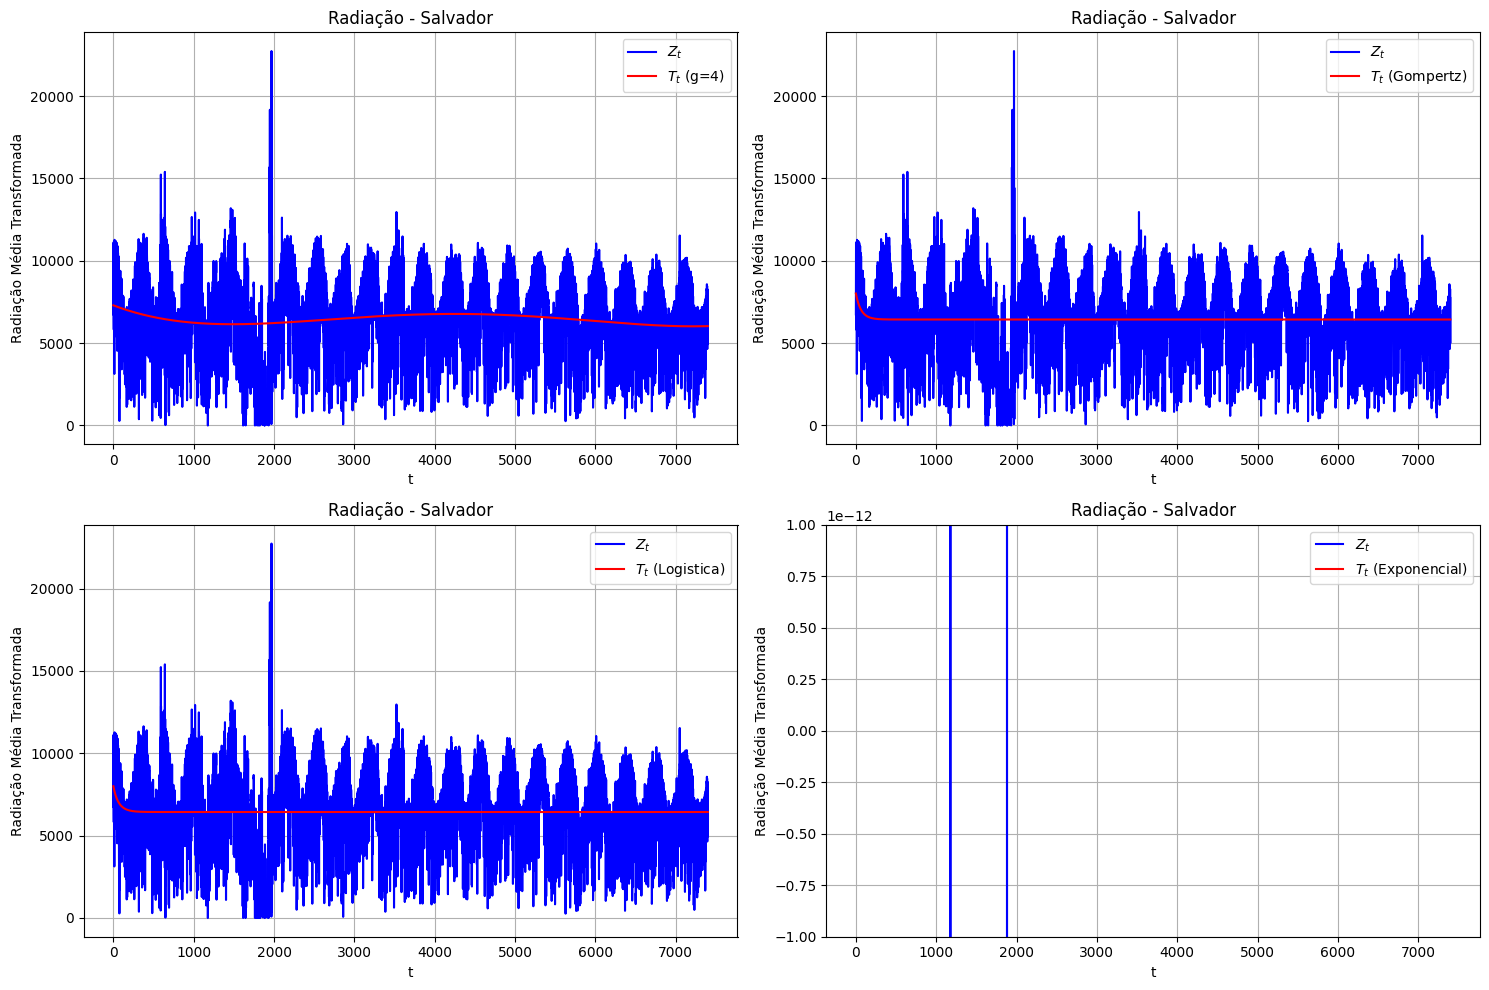

In [42]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Radiação - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

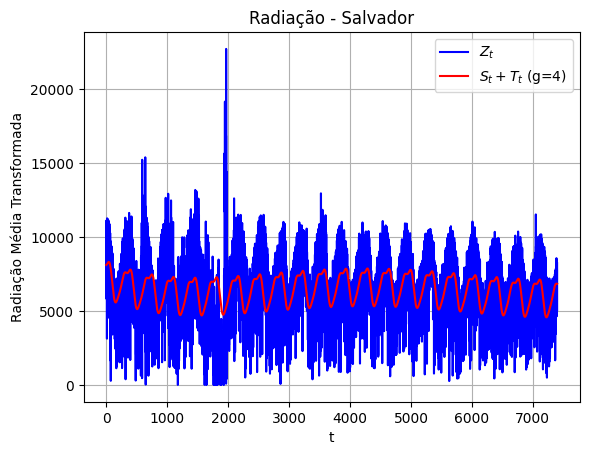

In [43]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Radiação - Salvador", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Manaus:

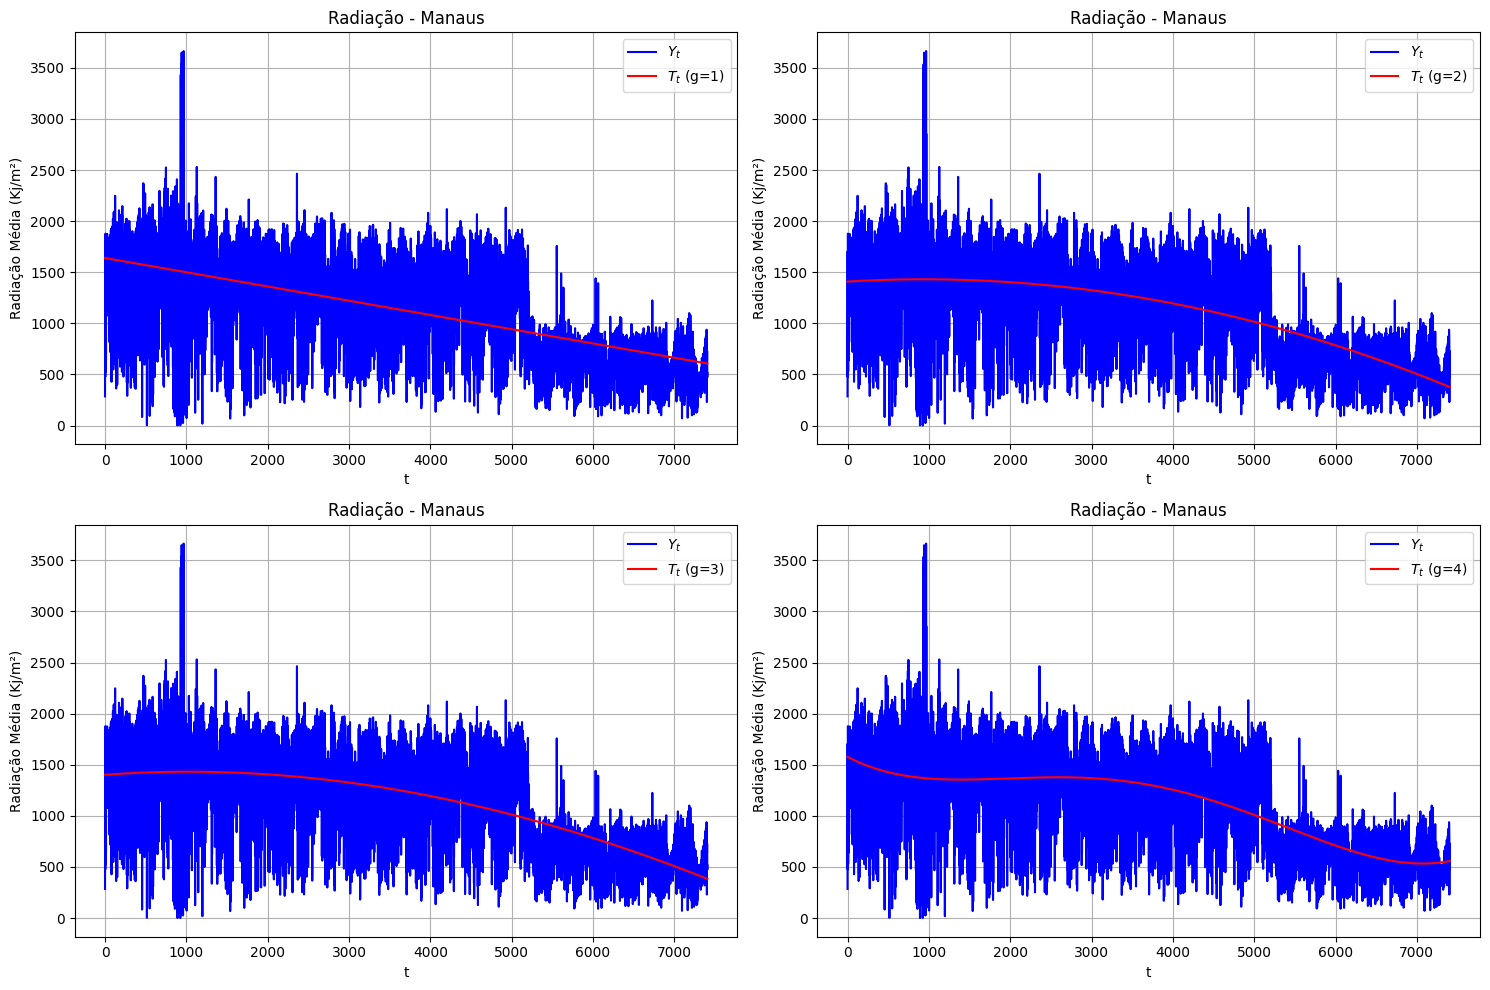

In [44]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_AM, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Radiação Média (Kj/m²)" if valor_lambda is None else "Radiação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Radiação - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

In [ ]:
# T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
# T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
# T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

# seqs = [[Z_t, seqs_T_t[-1]],
#         [Z_t, T_t_2],
#         [Z_t, T_t_3],
#         [Z_t, T_t_4]]

# config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
# config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
# config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
# config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
# config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

# config_seqs = [[config_0, config_1],
#                [config_0, config_2],
#                [config_0, config_3],
#                [config_0, config_4]]

# config_5 = {"titulo":"Radiação - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
# config_graf = [config_5]*4

# imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

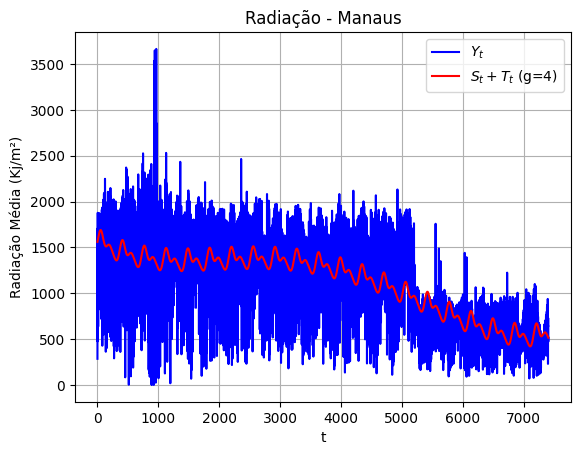

In [46]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Radiação - Manaus", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Rio de Janeiro:

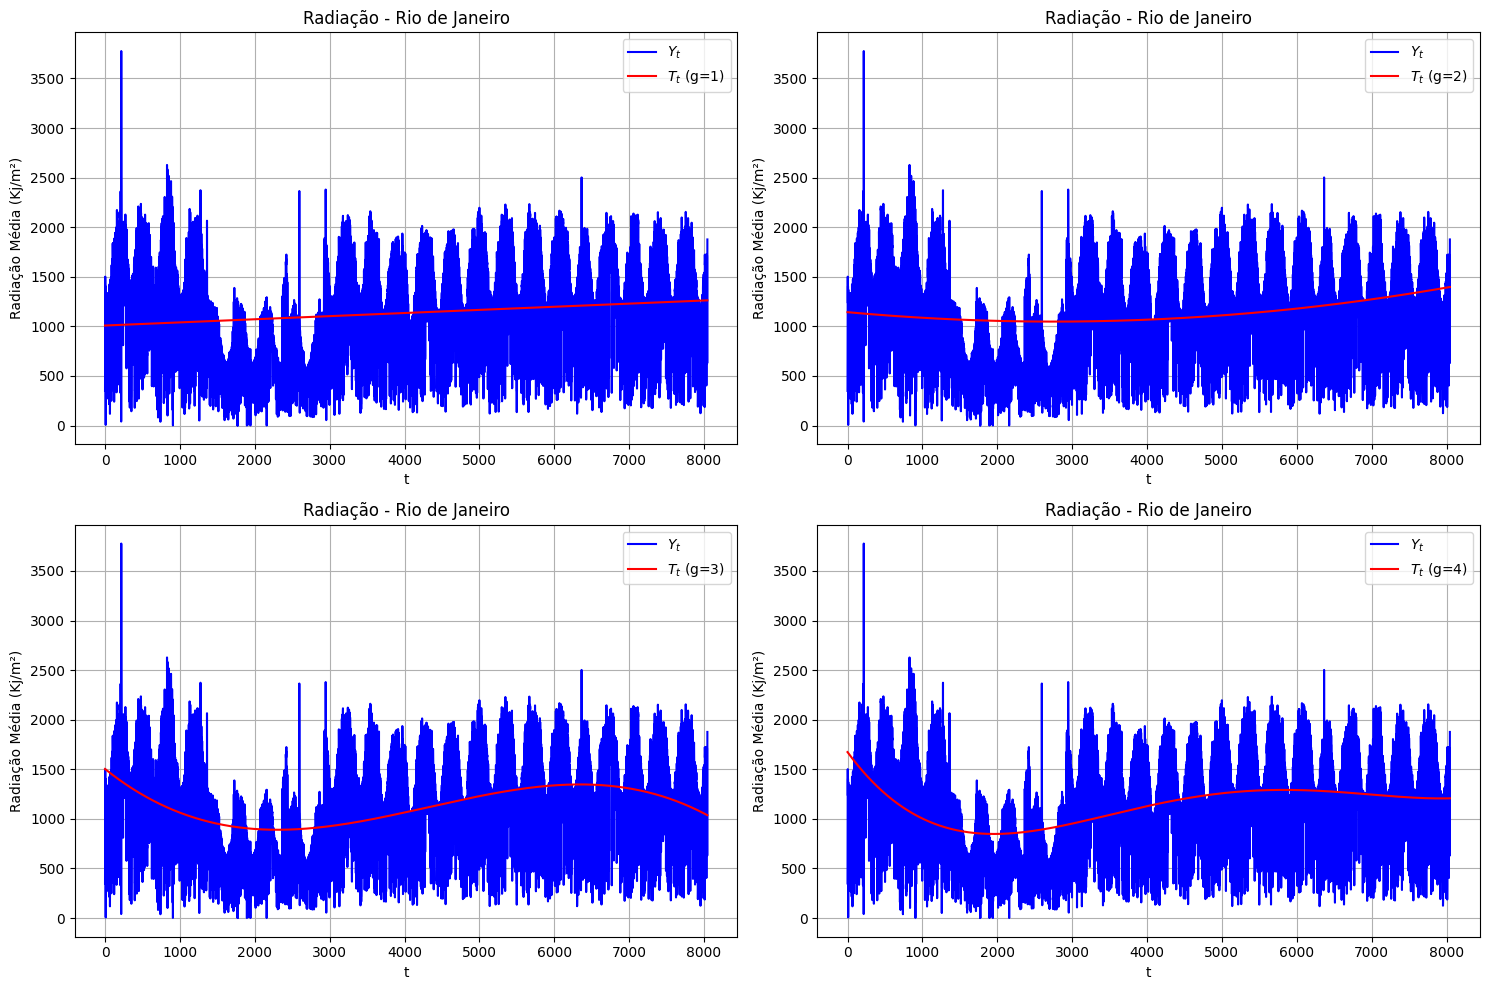

In [47]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_RJ, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Radiação Média (Kj/m²)" if valor_lambda is None else "Radiação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Radiação - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = (alfa-Y_t_ss[0])/Y_t_ss[0] if Y_t_ss[0] != 0 else 1.0 # taxa de crescimento inicial.
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:210: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_Y = Y_t_ss[1]-Y_t_ss[0] if Y_t_ss[1] != Y_t_ss[0] else 1.0
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:243: FutureWarning: Series.__

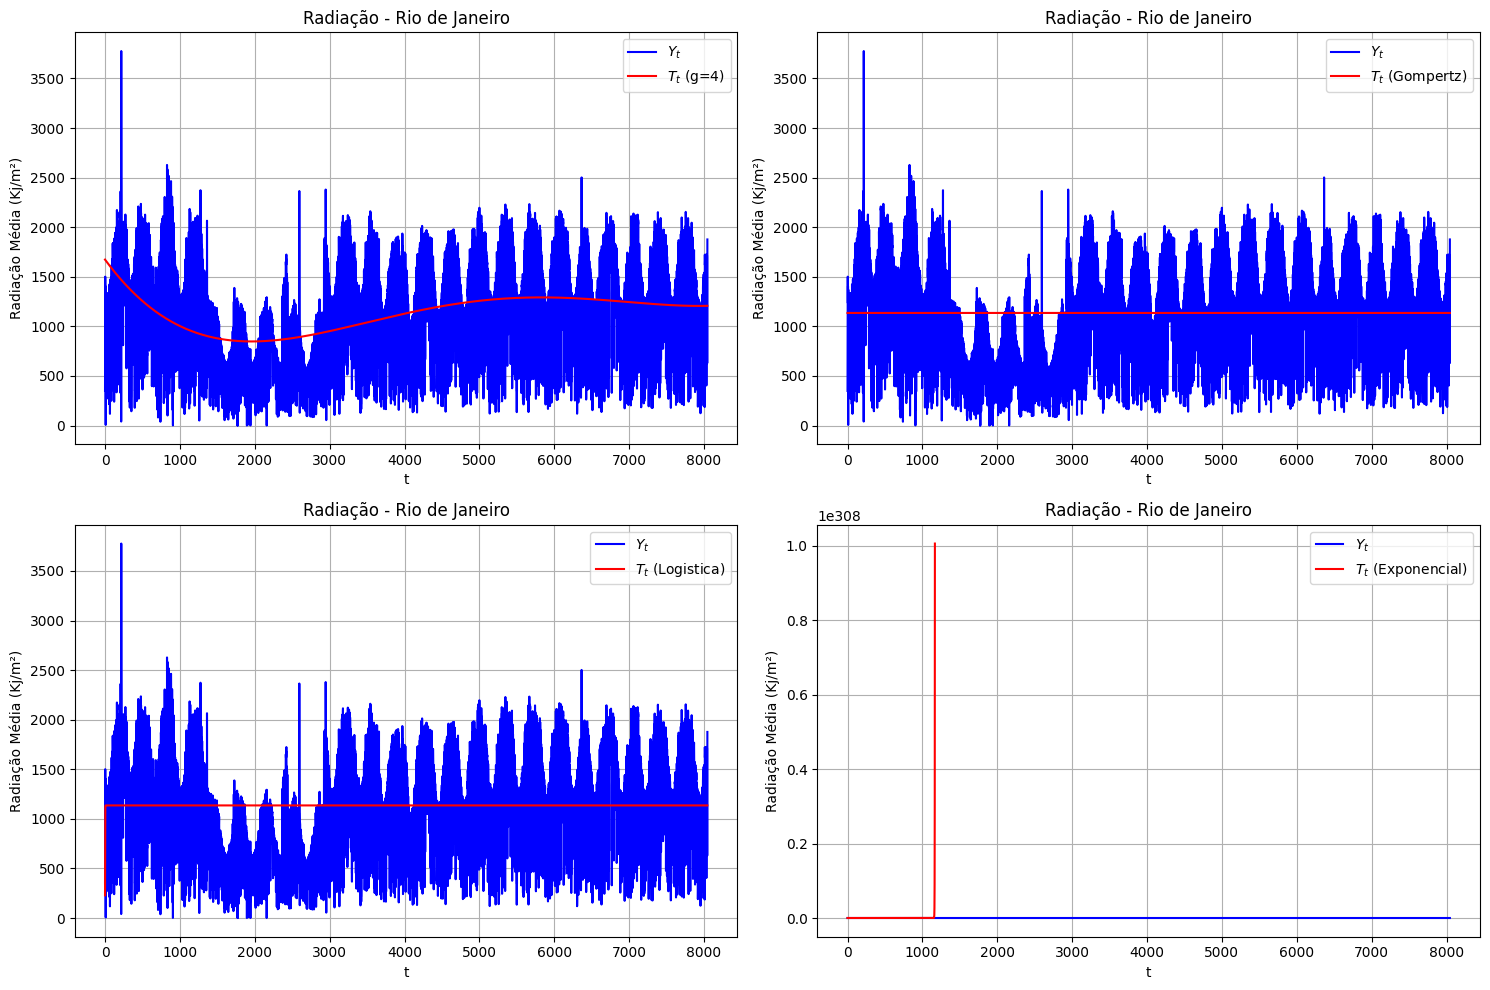

In [48]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Radiação - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

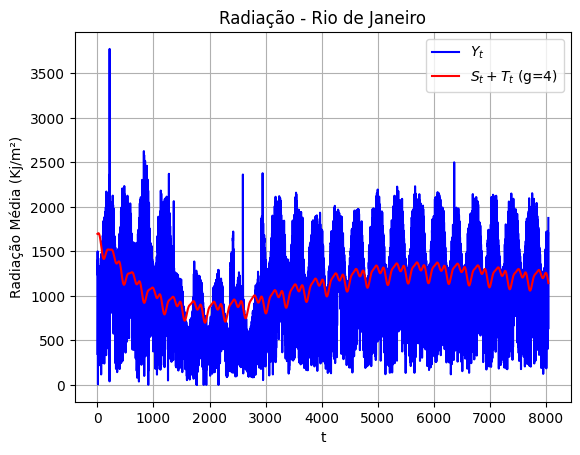

In [49]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Radiação - Rio de Janeiro", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)

### Porto Alegre:

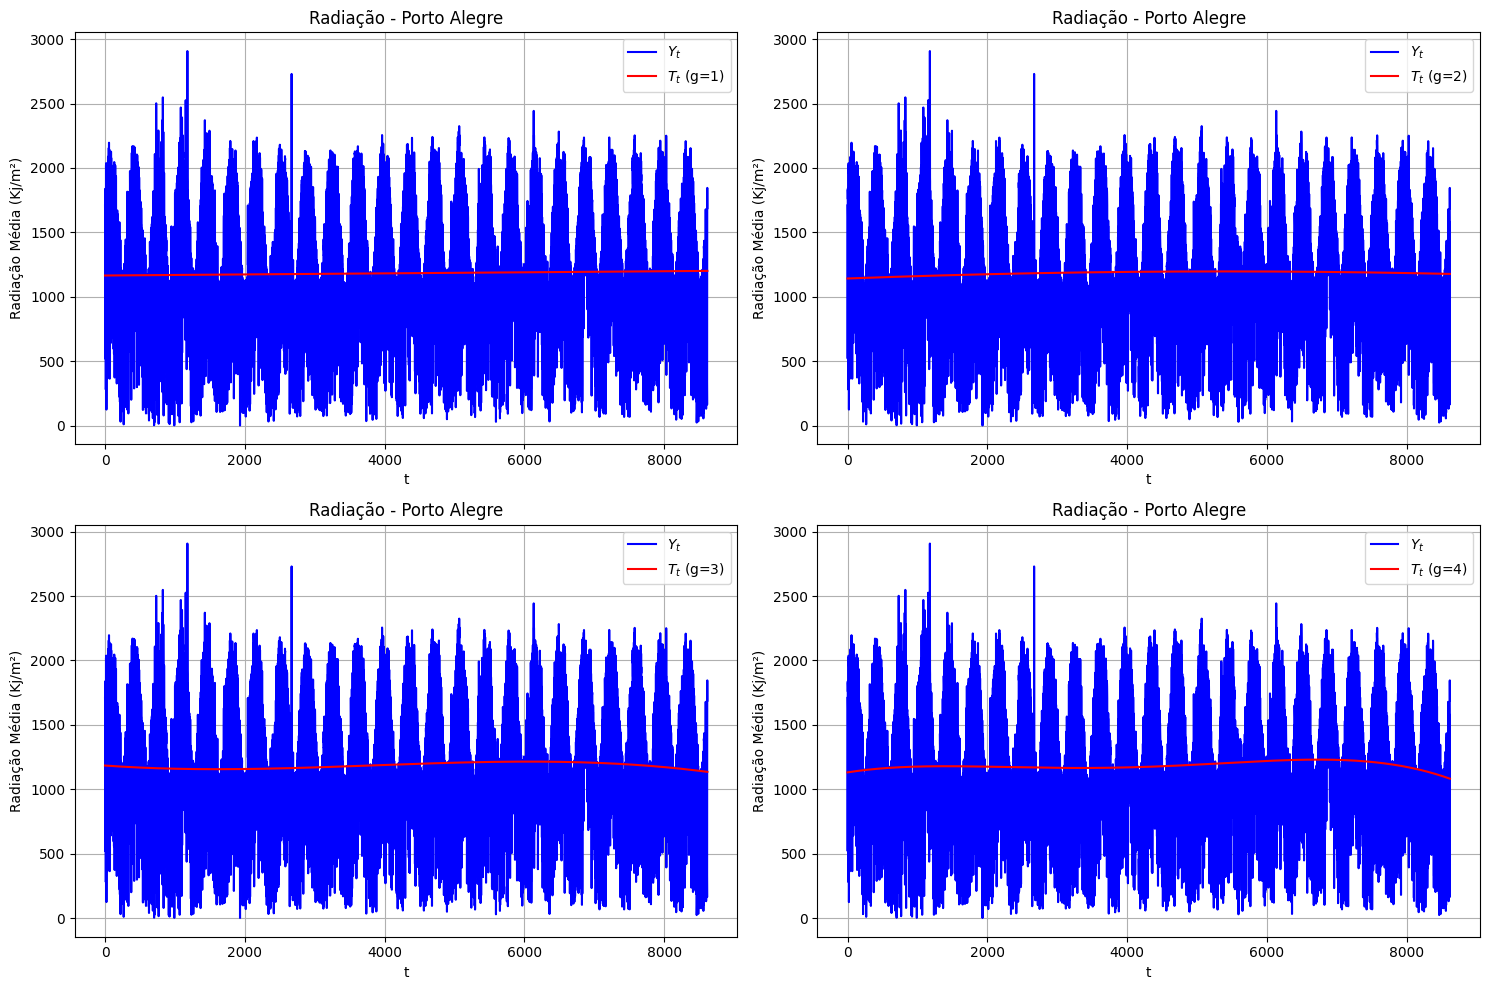

In [50]:
Y_t = mana.gera_sequencia_temporal_de_media_por_data(df_RS, atr_temporal, atr_imagem)
t =  np.arange(Y_t.size) # cria eixo das abscissas respectivo a ordem temporal.
Z_t, valor_lambda = mana.tenta_aplicar_transformacao_Box_Cox(Y_t, t)
S_t = mana.ajusta_sequencia_de_polinomio_harmonico_para_sazonalidade(Z_t, 3, 365.25, t)
Y_t_ss = Z_t - S_t # calcula a respectiva sequência sem a sazonalidade.

g = 4 # grau limite.
seqs_T_t = mana.ajusta_sequencias_de_polinomios_para_tendencia(Y_t_ss, g, t)
seqs = [[Z_t, seqs_T_t[i]] for i in range(g)] # gera as sequências dos subgráficos.

leg = "$Y_t$" if valor_lambda is None else "$Z_t$"
ry = "Radiação Média (Kj/m²)" if valor_lambda is None else "Radiação Média Transformada"

config_1 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_2 = [{"tipo":"line", "legenda":f"$T_t$ (g={i})", "cor":"red"} for i in range(1, g+1)]
config_3 = {"titulo":"Radiação - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}

config_seqs = [[config_1, config_2[i]] for i in range(g)]
config_graf = [config_3]*g
imgr.plota_grafico_de_subgraficos_de_sequencias(g, seqs, config_seqs, config_graf, t)

/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = (alfa-Y_t_ss[0])/Y_t_ss[0] if Y_t_ss[0] != 0 else 1.0 # taxa de crescimento inicial.
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:210: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_Y = Y_t_ss[1]-Y_t_ss[0] if Y_t_ss[1] != Y_t_ss[0] else 1.0
/home/vrr/Área de trabalho/SME0808+-+Series+Temporais+e+Aprendizado+Dinamico/Mega+Projeto/metodos_analiticos.py:243: FutureWarning: Series.__

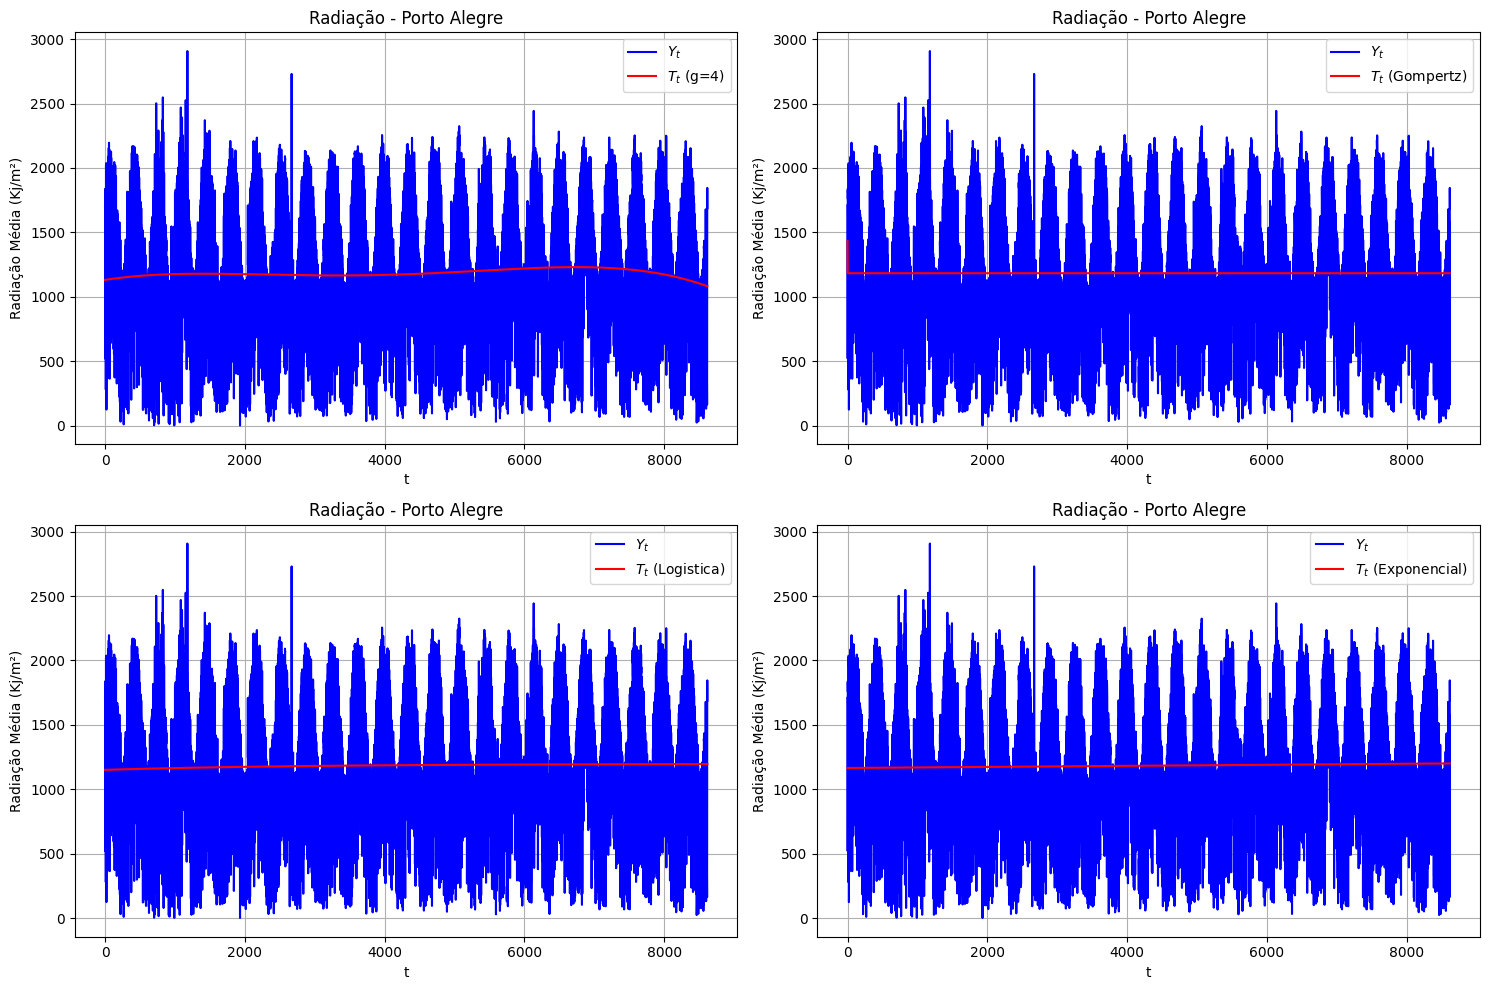

In [51]:
T_t_2 = mana.ajusta_sequencia_de_uma_curva_de_Gompertz_para_tendencia(Y_t_ss, t)
T_t_3 = mana.ajusta_sequencia_de_uma_curva_logistica_para_tendencia(Y_t_ss, t)
T_t_4 = mana.ajusta_sequencia_de_uma_curva_exponencial_para_tendencia(Y_t_ss, t)

seqs = [[Z_t, seqs_T_t[-1]],
        [Z_t, T_t_2],
        [Z_t, T_t_3],
        [Z_t, T_t_4]]

config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$T_t$ (g={g})", "cor":"red"}
config_2 = {"tipo":"line", "legenda":f"$T_t$ (Gompertz)", "cor":"red"}
config_3 = {"tipo":"line", "legenda":f"$T_t$ (Logistica)", "cor":"red"}
config_4 = {"tipo":"line", "legenda":f"$T_t$ (Exponencial)", "cor":"red"}

config_seqs = [[config_0, config_1],
               [config_0, config_2],
               [config_0, config_3],
               [config_0, config_4]]

config_5 = {"titulo":"Radiação - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
config_graf = [config_5]*4

imgr.plota_grafico_de_subgraficos_de_sequencias(4, seqs, config_seqs, config_graf, t)

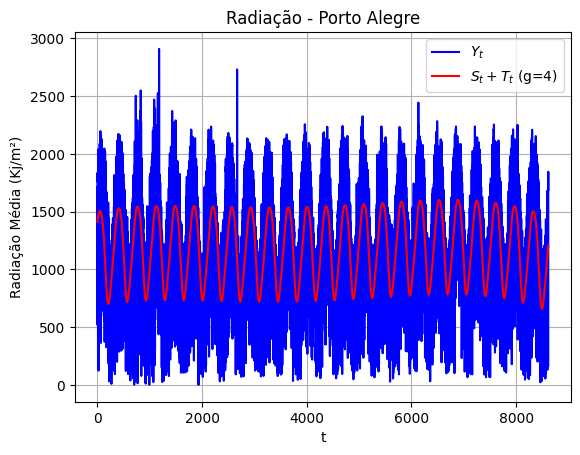

In [52]:
config_0 = {"tipo":"line", "legenda":leg, "cor":"blue"}
config_1 = {"tipo":"line", "legenda":f"$S_t+T_t$ (g={g})", "cor":"red"}
config_graf = {"titulo":"Radiação - Porto Alegre", "rotulo_de_x":"t", "rotulo_de_y":ry, "grade":True}
imgr.plota_grafico_de_sequencias([Z_t, S_t+seqs_T_t[-1]], [config_0, config_1], config_graf, t)